# Demo version 1.8





## Import the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Comments_labelled.csv to Comments_labelled (1).csv


In [ ]:
import pandas as pd

# Load your data with the correct encoding
file_path = 'Comments_labelled.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Display the column names to inspect them
print(data.columns)



Index(['ï»¿Date', 'Question', 'Comment', 'Purpose', 'Customer focused',
       'Innovation ', 'One team', 'Empowered/Development/ (Potential)',
       'Diversity & Well-Being', 'Score', 'Group', 'Driver/Value'],
      dtype='object')


### Pre-clean up


In [ ]:
# Rename the 'ï»¿Date' column to 'Date'
data.rename(columns={'ï»¿Date': 'Date'}, inplace=True)

# Now integrate this with the rest of your cleaning steps
# Handling encoding issues
data['Comment'] = data['Comment'].str.encode('latin1').str.decode('utf-8', 'ignore')

# Checking for missing values
missing_values = data.isnull().sum()

# Dropping duplicates
data_cleaned = data.drop_duplicates()

# Converting 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Renaming columns for consistency
data_cleaned.rename(columns={
    'Customer focused': 'Customer',
    'Empowered/Development/ (Potential)': 'Growth and Development',
    'Diversity & Well-Being': 'Diversity and Wellbeing'
}, inplace=True)

# Rechecking for any issues in data types or null values
data_cleaned_info = data_cleaned.info()
missing_values_cleaned = data_cleaned.isnull().sum()

# Display the cleaned information
print(data_cleaned_info)
print(missing_values)
print(missing_values_cleaned)
print(data_cleaned.head())

# Save the cleaned data to a new file
data_cleaned.to_csv('cleaned_output.csv', index=False)

print("Data cleaned and saved successfully!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1200 non-null   datetime64[ns]
 1   Question                 1200 non-null   object        
 2   Comment                  1200 non-null   object        
 3   Purpose                  1200 non-null   int64         
 4   Customer                 1200 non-null   int64         
 5   Innovation               1200 non-null   int64         
 6   One team                 1200 non-null   int64         
 7   Growth and Development   1200 non-null   int64         
 8   Diversity and Wellbeing  1200 non-null   int64         
 9   Score                    1194 non-null   float64       
 10  Group                    1200 non-null   object        
 11  Driver/Value             1200 non-null   object        
dtypes: datetime64[ns](1), float64(1), 

### double check for missing values

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cleaned_output.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Handle encoding issues
data['Comment'] = data['Comment'].str.encode('latin1').str.decode('utf-8', 'ignore')

# Drop duplicates
data_cleaned = data.drop_duplicates()

# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Print column names to verify them
print("Column Names:", data_cleaned.columns)

# Rename columns for consistency
data_cleaned.rename(columns={
    'Customer focused': 'Customer',
    'Empowered/Development/ (Potential)': 'Growth and Development',
    'Diversity & Well-Being': 'Diversity and Wellbeing'
}, inplace=True)

# Verify the column names after renaming
print("Updated Column Names:", data_cleaned.columns)

# Check for leading/trailing spaces in column names
data_cleaned.columns = data_cleaned.columns.str.strip()

# Verify the column names after stripping spaces
print("Stripped Column Names:", data_cleaned.columns)

Column Names: Index(['Date', 'Question', 'Comment', 'Purpose', 'Customer', 'Innovation ',
       'One team', 'Growth and Development', 'Diversity and Wellbeing',
       'Score', 'Group', 'Driver/Value'],
      dtype='object')
Updated Column Names: Index(['Date', 'Question', 'Comment', 'Purpose', 'Customer', 'Innovation ',
       'One team', 'Growth and Development', 'Diversity and Wellbeing',
       'Score', 'Group', 'Driver/Value'],
      dtype='object')
Stripped Column Names: Index(['Date', 'Question', 'Comment', 'Purpose', 'Customer', 'Innovation',
       'One team', 'Growth and Development', 'Diversity and Wellbeing',
       'Score', 'Group', 'Driver/Value'],
      dtype='object')


In [ ]:
# save a copy of cleaned dataset
cleaned_file_path = 'cleaned_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)


In [ ]:
# Display the cleaned information
print(data_cleaned_info)
print(missing_values)
print(missing_values_cleaned)
print(data_cleaned.head())

None
Date                                  0
Question                              0
Comment                               0
Purpose                               0
Customer focused                      0
Innovation                            0
One team                              0
Empowered/Development/ (Potential)    0
Diversity & Well-Being                0
Score                                 6
Group                                 0
Driver/Value                          0
dtype: int64
Date                       0
Question                   0
Comment                    0
Purpose                    0
Customer                   0
Innovation                 0
One team                   0
Growth and Development     0
Diversity and Wellbeing    0
Score                      6
Group                      0
Driver/Value               0
dtype: int64
        Date                                           Question  \
0 2024-04-08  Abcam's values provide a good fit with the thi...   
1 2024-

In [ ]:
# Check the data is correctly stored
import os
os.path.exists(cleaned_file_path)


True

### EDA


<ipython-input-9-50f3e4ca6ea5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dimension_counts.index, y=dimension_counts.values, palette='viridis')
<ipython-input-9-50f3e4ca6ea5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_distribution.index, y=score_distribution.values, palette='viridis')


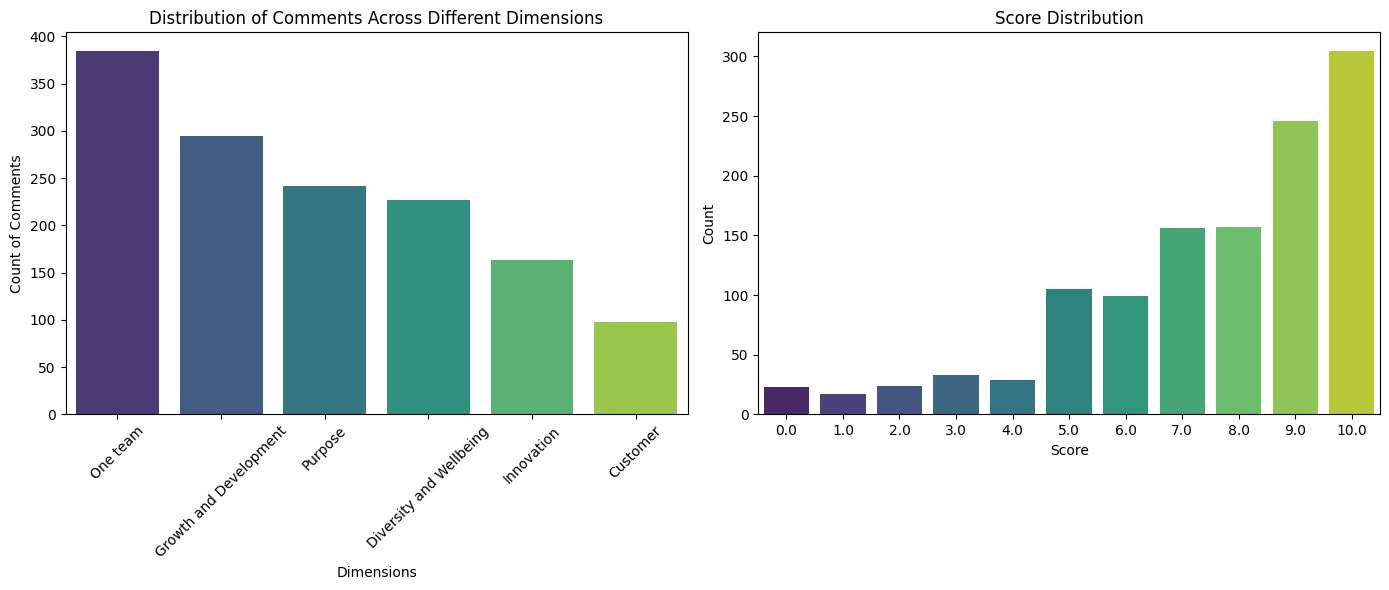

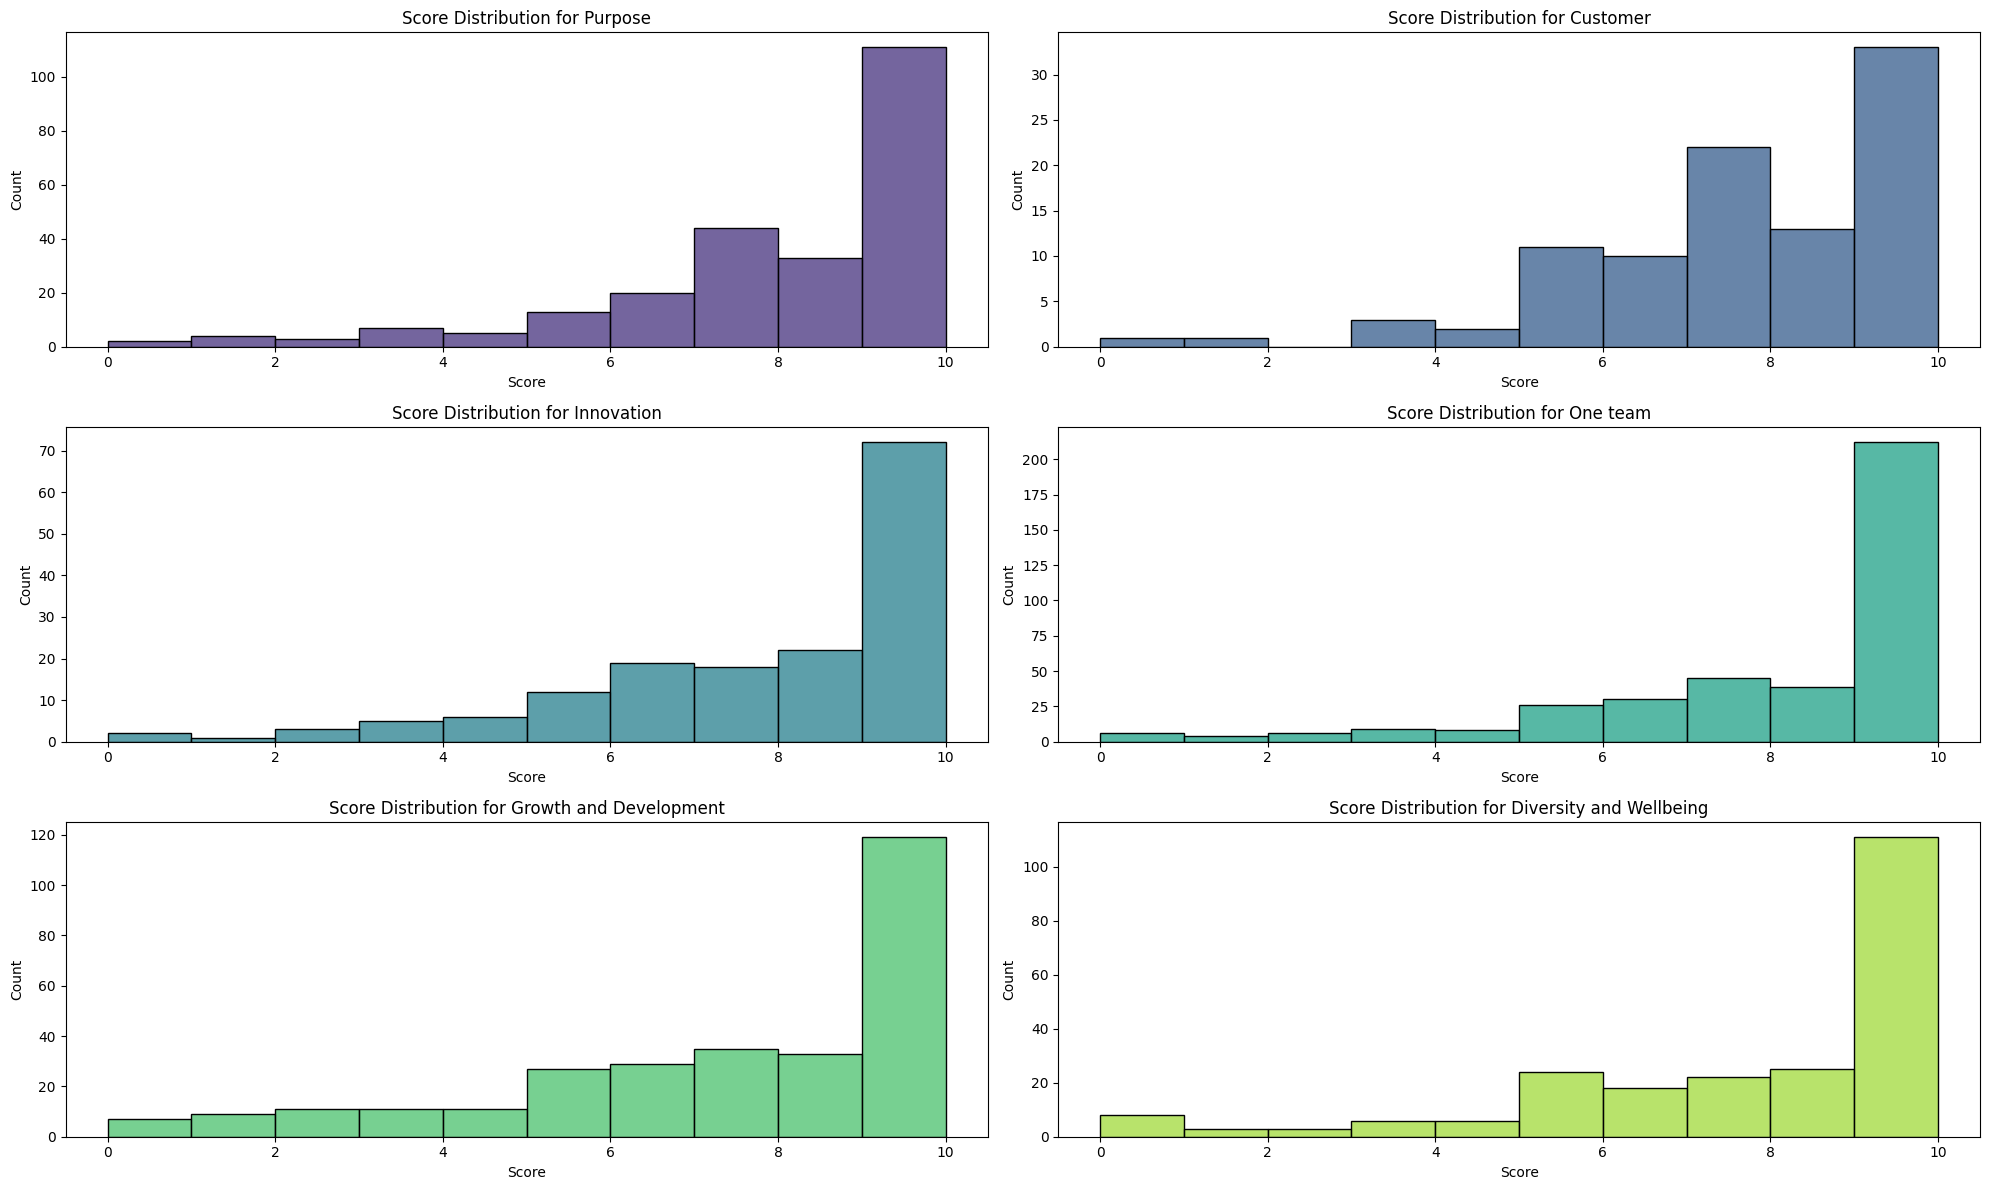

(                      Date      Purpose     Customer   Innovation  \
 count                 1200  1200.000000  1200.000000  1200.000000   
 mean   2024-04-21 07:30:00     0.201667     0.081667     0.135833   
 min    2024-04-03 00:00:00     0.000000     0.000000     0.000000   
 25%    2024-04-04 00:00:00     0.000000     0.000000     0.000000   
 50%    2024-05-01 00:00:00     0.000000     0.000000     0.000000   
 75%    2024-05-06 00:00:00     0.000000     0.000000     0.000000   
 max    2024-05-11 00:00:00     1.000000     1.000000     1.000000   
 std                    NaN     0.401412     0.273970     0.342754   
 
           One team  Growth and Development  Diversity and Wellbeing  \
 count  1200.000000             1200.000000              1200.000000   
 mean      0.320833                0.245833                 0.189167   
 min       0.000000                0.000000                 0.000000   
 25%       0.000000                0.000000                 0.000000   
 50%    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data overview
summary_statistics = data_cleaned.describe()

# Distribution of comments across different dimensions
dimensions = ['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']
dimension_counts = data_cleaned[dimensions].sum().sort_values(ascending=False)

# Distribution of 'Score'
score_distribution = data_cleaned['Score'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(14, 6))

# Bar plot for dimensions
plt.subplot(1, 2, 1)
sns.barplot(x=dimension_counts.index, y=dimension_counts.values, palette='viridis')
plt.title('Distribution of Comments Across Different Dimensions')
plt.xticks(rotation=45)
plt.xlabel('Dimensions')
plt.ylabel('Count of Comments')

# Bar plot for score distribution
plt.subplot(1, 2, 2)
sns.barplot(x=score_distribution.index, y=score_distribution.values, palette='viridis')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Define a color palette for the dimensions
color_palette = sns.color_palette('viridis', len(dimensions))

# Plotting score distribution for each dimension with different colors
plt.figure(figsize=(20, 12))
for i, (dimension, color) in enumerate(zip(dimensions, color_palette), 1):
    plt.subplot(3, 2, i)
    dimension_scores = data_cleaned[data_cleaned[dimension] == 1]['Score']
    sns.histplot(dimension_scores, bins=10, kde=False, color=color)
    plt.title(f'Score Distribution for {dimension}')
    plt.xlabel('Score')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

summary_statistics, dimension_counts, score_distribution


## Comment Length Analysis:

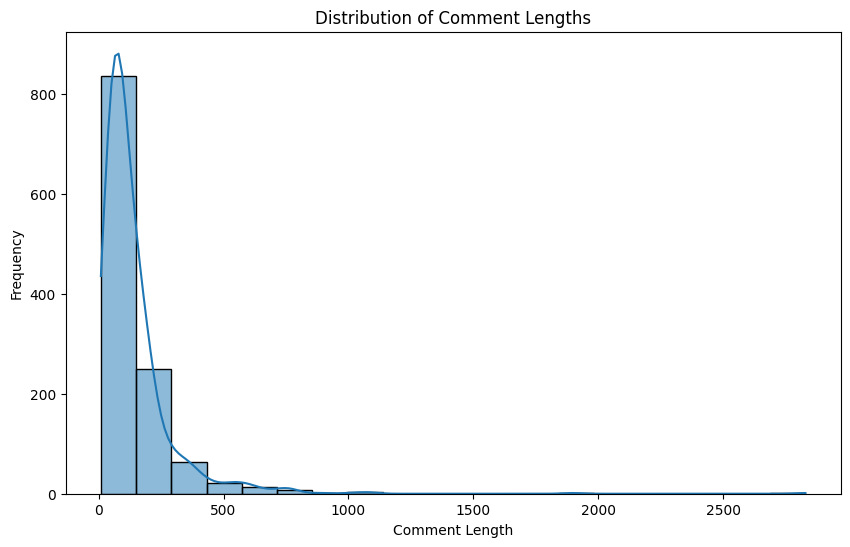

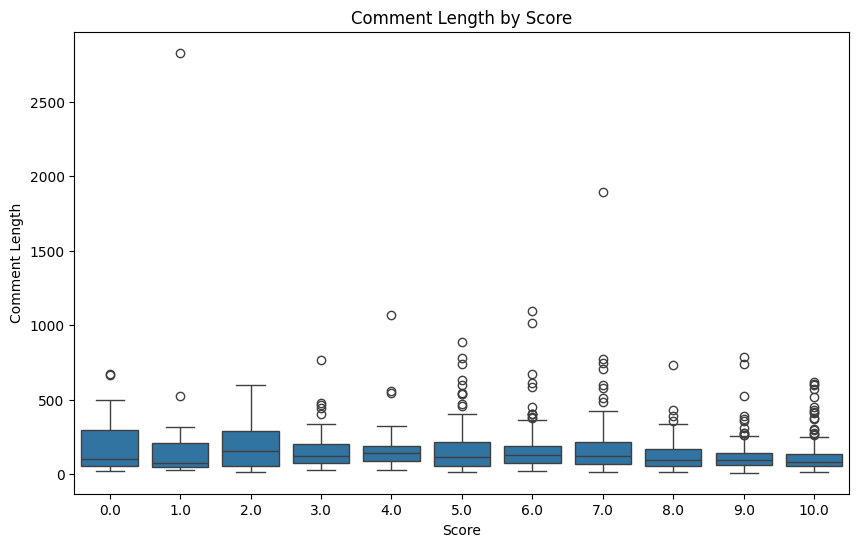

In [ ]:
# Add a new column for comment length
data_cleaned['Comment Length'] = data_cleaned['Comment'].apply(len)

# Histogram of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Comment Length'], bins=20, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

# Box plot of comment lengths by Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Comment Length', data=data_cleaned)
plt.title('Comment Length by Score')
plt.xlabel('Score')
plt.ylabel('Comment Length')
plt.show()


## Temporal Analysis:

In [ ]:
!pip install wordcloud

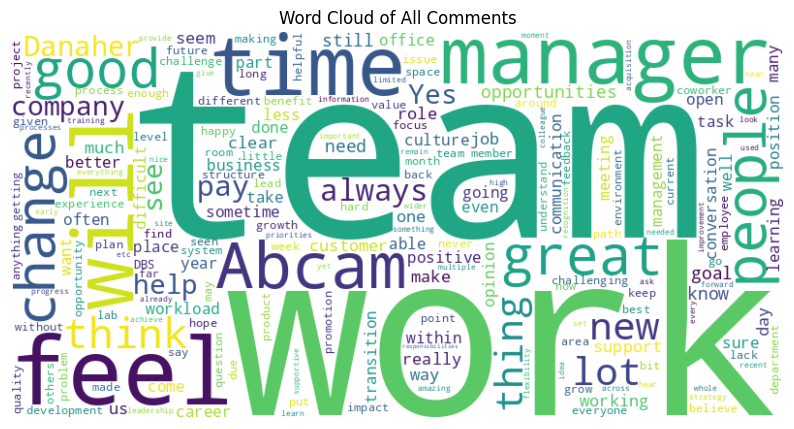

In [ ]:
from wordcloud import WordCloud

# Word cloud for all comments
all_comments = ' '.join(data_cleaned['Comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Comments')
plt.show()


## Data preprocessing & Word Embedding methods


### Preprocess Data

In [ ]:
import pandas as pd
import spacy
import subprocess
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Function to install spaCy model
def install_spacy_model(model_name):
    subprocess.call([sys.executable, "-m", "spacy", "download", model_name])

# Install the spaCy model
install_spacy_model('en_core_web_sm')

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Load dataset
#data_cleaned = pd.read_csv('/path_to_your_cleaned_dataset.csv')  # Load your dataset here

# Handling missing values
data_cleaned.dropna(subset=['Question', 'Comment'], inplace=True)

# Apply preprocessing to 'Question' and 'Comment' columns
data_cleaned['Cleaned_Question'] = data_cleaned['Question'].apply(preprocess_text_spacy)
data_cleaned['Cleaned_Comment'] = data_cleaned['Comment'].apply(preprocess_text_spacy)

# Concatenate the cleaned questions and comments
data_cleaned['Cleaned_Question_Comment'] = data_cleaned['Cleaned_Question'] + " " + data_cleaned['Cleaned_Comment']

# Handle duplicates
data_cleaned.drop_duplicates(subset=['Cleaned_Question_Comment'], inplace=True)

# Optionally, remove very short or long comments
data_cleaned = data_cleaned[data_cleaned['Cleaned_Question_Comment'].str.split().str.len().between(5, 100)]

# Split the dataset
X = data_cleaned['Cleaned_Question_Comment']
y = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### BoW embedding and training


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get BoW embeddings
def get_bow_embeddings(texts):
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(texts), vectorizer

# Generate BoW embeddings for train and test sets
X_train_bow, bow_vectorizer = get_bow_embeddings(X_train.tolist())
X_test_bow = bow_vectorizer.transform(X_test.tolist())

# Check shapes after embedding
print(f"X_train_bow shape: {X_train_bow.shape}")
print(f"X_test_bow shape: {X_test_bow.shape}")


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to train and evaluate the model for multi-label classification
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics for multi-label classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    return accuracy, precision, recall, f1

# Train and evaluate the model with BoW embeddings
accuracy_bow, precision_bow, recall_bow, f1_bow = train_and_evaluate(X_train_bow, y_train, X_test_bow, y_test)

# Print the results
print(f"BoW - Accuracy: {accuracy_bow}, Precision: {precision_bow}, Recall: {recall_bow}, F1 Score: {f1_bow}")


### TF-IDF Embeddings and trained on regression model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Check the initial shapes of X and y
print(f"Initial X shape: {X.shape}")
print(f"Initial y shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes after splitting
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check shapes after vectorization
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

# Function to train and evaluate the model for multi-label classification
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics for multi-label classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    return accuracy, precision, recall, f1

# Train and evaluate the model with TF-IDF data
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = train_and_evaluate(X_train_tfidf, y_train, X_test_tfidf, y_test)

# Print the results
print(f"Accuracy: {accuracy_tfidf}")
print(f"Precision: {precision_tfidf}")
print(f"Recall: {recall_tfidf}")
print(f"F1 Score: {f1_tfidf}")


### BERT Embeddings and training

In [ ]:
!pip install torch

In [ ]:
import torch
from transformers import DistilBertModel, DistilBertTokenizer

# Load DistilBERT model and tokenizer
distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Function to get DistilBERT embeddings
def get_distilbert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

# Tokenize the entire dataset
X_train_distilbert = get_distilbert_embeddings(X_train.tolist(), distilbert_tokenizer, distilbert_model)
X_test_distilbert = get_distilbert_embeddings(X_test.tolist(), distilbert_tokenizer, distilbert_model)

# Check shapes after embedding
print(f"X_train_distilbert shape: {X_train_distilbert.shape}")
print(f"X_test_distilbert shape: {X_test_distilbert.shape}")


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to train and evaluate the model for multi-label classification
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics for multi-label classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    return accuracy, precision, recall, f1

# Train and evaluate the model with DistilBERT embeddings
accuracy_distilbert, precision_distilbert, recall_distilbert, f1_distilbert = train_and_evaluate(X_train_distilbert, y_train, X_test_distilbert, y_test)

# Print the results
print(f"Accuracy: {accuracy_distilbert}")
print(f"Precision: {precision_distilbert}")
print(f"Recall: {recall_distilbert}")
print(f"F1 Score: {f1_distilbert}")


In [ ]:
import pandas as pd

# Load your dataset
#data_cleaned = pd.read_csv('path_to_your_cleaned_dataset.csv')

# Use only the 'Comment' column as input
comments = data_cleaned['Comment'].tolist()

# Define the labels for multi-label classification
labels = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].values


In [ ]:
import torch
from transformers import DistilBertModel, DistilBertTokenizer

# Load DistilBERT model and tokenizer
distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Function to get DistilBERT embeddings
def get_distilbert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

# Generate embeddings for the entire dataset using the 'Comment' column
embeddings = get_distilbert_embeddings(comments, distilbert_tokenizer, distilbert_model)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to train and evaluate the model for multi-label classification
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics for multi-label classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    return accuracy, precision, recall, f1

# Train and evaluate the model with DistilBERT embeddings
accuracy_distilbert, precision_distilbert, recall_distilbert, f1_distilbert = train_and_evaluate(X_train, y_train, X_test, y_test)

# Print the results
print(f"Accuracy: {accuracy_distilbert}")
print(f"Precision: {precision_distilbert}")
print(f"Recall: {recall_distilbert}")
print(f"F1 Score: {f1_distilbert}")


### Word2vec

In [ ]:
pip install gensim


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

def tokenize_texts(texts):
    tokenized = []
    for text in texts:
        if isinstance(text, str):
            tokenized.append(text.split())
        elif isinstance(text, list):
            tokenized.append([str(item) for item in text])  # Convert all items to strings
        else:
            tokenized.append([str(text)])  # Convert single items to a list with one string element
    return tokenized

# Debugging: Print the type and first element of X_train
print(f"Type of X_train: {type(X_train)}")
print(f"Type of first element in X_train: {type(X_train[0])}")
print(f"First element of X_train: {X_train[0]}")

X_train_tokenized = tokenize_texts(X_train.tolist())
X_test_tokenized = tokenize_texts(X_test.tolist())

# Debugging: Print the first few tokenized texts
print(f"First 5 tokenized texts: {X_train_tokenized[:5]}")

word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_embeddings(texts, model):
    embeddings = []
    for text in texts:
        if not text:  # Handle empty text
            embeddings.append(np.zeros(model.vector_size))
        else:
            vector = np.mean([model.wv[word] for word in text if word in model.wv], axis=0)
            if np.isnan(vector).any():  # Handle case where no words are in the model
                vector = np.zeros(model.vector_size)
            embeddings.append(vector)
    return np.array(embeddings)

X_train_word2vec = get_word2vec_embeddings(X_train_tokenized, word2vec_model)
X_test_word2vec = get_word2vec_embeddings(X_test_tokenized, word2vec_model)

print(f"X_train_word2vec shape: {X_train_word2vec.shape}")
print(f"X_test_word2vec shape: {X_test_word2vec.shape}")

In [ ]:
# Train and evaluate the model with Word2Vec embeddings
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = train_and_evaluate(X_train_word2vec, y_train, X_test_word2vec, y_test)

# Print the results
print(f"Word2Vec - Accuracy: {accuracy_word2vec}, Precision: {precision_word2vec}, Recall: {recall_word2vec}, F1 Score: {f1_word2vec}")


### Compare Results & Visualize Performance

In [ ]:
# Assuming TF-IDF and DistilBERT results are already available
# accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf
# accuracy_distilbert, precision_distilbert, recall_distilbert, f1_distilbert

import pandas as pd
import matplotlib.pyplot as plt

# Compile results
results = {
    'Embedding': ['BoW', 'TF-IDF', 'DistilBERT'],
    'Accuracy': [accuracy_bow, accuracy_tfidf, accuracy_distilbert],
    'Precision': [precision_bow, precision_tfidf, precision_distilbert],
    'Recall': [recall_bow, recall_tfidf, recall_distilbert],
    'F1 Score': [f1_bow, f1_tfidf, f1_distilbert]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualize the results
def plot_metrics(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 5))

    for i, metric in enumerate(metrics):
        ax[i].bar(results_df['Embedding'], results_df[metric], color=['skyblue', 'lightgreen', 'lightcoral'])
        ax[i].set_title(metric)
        ax[i].set_ylim(0, 1)
        ax[i].set_xlabel('Embedding')
        ax[i].set_ylabel(metric)
        for j, v in enumerate(results_df[metric]):
            ax[i].text(j, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_metrics(results_df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compile results
results = {
    'Embedding': ['TF-IDF', 'DistilBERT'],
    'Accuracy': [accuracy_tfidf, accuracy_distilbert],
    'Precision': [precision_tfidf, precision_distilbert],
    'Recall': [recall_tfidf, recall_distilbert],
    'F1 Score': [f1_tfidf, f1_distilbert]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualize the results
def plot_metrics(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 5))

    for i, metric in enumerate(metrics):
        ax[i].bar(results_df['Embedding'], results_df[metric], color=['skyblue', 'lightgreen', 'lightcoral'])
        ax[i].set_title(metric)
        ax[i].set_ylim(0, 1)
        ax[i].set_xlabel('Embedding')
        ax[i].set_ylabel(metric)
        for j, v in enumerate(results_df[metric]):
            ax[i].text(j, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_metrics(results_df)


In [ ]:
# Compile results
results = {
    'Embedding': ['BoW', 'TF-IDF', 'DistilBERT', 'Word2Vec'],
    'Accuracy': [accuracy_bow, accuracy_tfidf, accuracy_distilbert, accuracy_word2vec],
    'Precision': [precision_bow, precision_tfidf, precision_distilbert, precision_word2vec],
    'Recall': [recall_bow, recall_tfidf, recall_distilbert, recall_word2vec],
    'F1 Score': [f1_bow, f1_tfidf, f1_distilbert, f1_word2vec]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualize the results
plot_metrics(results_df)


### Clustering and Visualization

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert y_train to a NumPy array if it's not already one
y_train_np = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)

# Function to visualize embeddings using PCA or t-SNE
def plot_embeddings(embeddings, labels, method='pca', title='Embeddings Visualization'):
    if method == 'pca':
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(embeddings)
    elif method == 'tsne':
        tsne = TSNE(n_components=2, random_state=42)
        reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', s=10)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# Ensure labels are in the correct format
labels = np.argmax(y_train_np, axis=1) if y_train_np.ndim > 1 else y_train_np

# Visualize Word2Vec embeddings
plot_embeddings(X_train_word2vec, labels, method='tsne', title='Word2Vec Embeddings with t-SNE')

# Visualize BoW embeddings
plot_embeddings(X_train_bow.toarray(), labels, method='pca', title='BoW Embeddings with PCA')

# Visualize TF-IDF embeddings
plot_embeddings(X_train_tfidf.toarray(), labels, method='pca', title='TF-IDF Embeddings with PCA')

# Visualize DistilBERT embeddings
plot_embeddings(X_train_distilbert, labels, method='tsne', title='DistilBERT Embeddings with t-SNE')

## Model selection & Training

In [ ]:
!pip install spacy

In [ ]:
!pip install torch

In [ ]:
import pandas as pd
import spacy
import subprocess
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode target labels
label_encoder = LabelEncoder()

# Check if y_train and y_test are already 1D arrays
if y_train.ndim == 1:
    y_train_combined = y_train
    y_test_combined = y_test
else:
    # If they are 2D (one-hot encoded), convert to 1D
    y_train_combined = np.argmax(y_train, axis=1)
    y_test_combined = np.argmax(y_test, axis=1)

# Encode the combined labels
y_train_encoded = label_encoder.fit_transform(y_train_combined)
y_test_encoded = label_encoder.transform(y_test_combined)

# Print shapes to verify
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

# Print unique classes
print("Unique classes in training set:", np.unique(y_train_encoded))
print("Unique classes in test set:", np.unique(y_test_encoded))

Random Forest setups for training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train and evaluate Random Forest
def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Train Random Forest model
rf_accuracy, rf_precision, rf_recall, rf_f1 = train_random_forest(X_train_bow, y_train_encoded, X_test_bow, y_test_encoded)
print(f'Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}')


Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Train and evaluate SVM
def train_svm(X_train, y_train, X_test, y_test):
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Train SVM model
svm_accuracy, svm_precision, svm_recall, svm_f1 = train_svm(X_train_bow, y_train_encoded, X_test_bow, y_test_encoded)
print(f'SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1 Score: {svm_f1}')


Gradient Boosting (XGBoost), muted as the run time is too long

In [ ]:
'''
import xgboost as xgb

# Train and evaluate XGBoost
def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Train XGBoost model
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = train_xgboost(X_train_bow, y_train_encoded, X_test_bow, y_test_encoded)
print(f'XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1 Score: {xgb_f1}')
'''

Keras

Convert Sparse Matrices to Dense

In [ ]:
# Convert the sparse matrices to dense
X_train_bow_dense = X_train_bow.toarray()
X_test_bow_dense = X_test_bow.toarray()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Train and evaluate Neural Network
def train_neural_network(X_train, y_train, X_test, y_test):
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(y_train_cat.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test, y_test_cat), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')

    return accuracy, precision, recall, f1

# Train Neural Network model
nn_accuracy, nn_precision, nn_recall, nn_f1 = train_neural_network(X_train_bow_dense, y_train_encoded, X_test_bow_dense, y_test_encoded)
print(f'Neural Network - Accuracy: {nn_accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, F1 Score: {nn_f1}')


Compare Models

In [ ]:
# Collect results into a DataFrame for comparison
results = [
    ['Random Forest', 'BoW', rf_accuracy, rf_precision, rf_recall, rf_f1],
    ['SVM', 'BoW', svm_accuracy, svm_precision, svm_recall, svm_f1],
    ['Neural Network', 'BoW', nn_accuracy, nn_precision, nn_recall, nn_f1]
]

results_df = pd.DataFrame(results, columns=['Model', 'Embedding', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)


Visualize Performance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import pandas as pd

# Create a DataFrame for visualization
results_df = pd.DataFrame(results, columns=['Model', 'Embedding', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Melt the DataFrame to make it suitable for seaborn
results_melted = results_df.melt(id_vars=['Model', 'Embedding'], var_name='Metric', value_name='Score')


In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(14, 8))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Precision'])
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Recall'])
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# F1 Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'F1 Score'])
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume results_melted is already defined

# Set the style and color palette
sns.set(style="whitegrid", font_scale=1.2)
colors = sns.color_palette("husl", 4)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Model Performance Comparison', fontsize=24, y=1.02)

# List of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar plot for each metric
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(x='Model', y='Score', data=results_melted[results_melted['Metric'] == metric],
                ax=ax, palette=colors)
    ax.set_title(f'{metric} Comparison', fontsize=18)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

# Adjust layout and add a legend
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Models', loc='center right', bbox_to_anchor=(1.2, 0.5))

# Add a text box with additional information
fig.text(0.5, -0.05,
         "This visualization compares the performance of different models across four key metrics.\n"
         "Higher scores indicate better performance for all metrics.",
         ha='center', va='center', fontsize=12, style='italic')

# Show the plot
plt.show()

### Bert train with un-preprocessed data

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset
#ata_cleaned = pd.read_csv('path_to_your_dataset.csv')

# Combine 'Question' and 'Comment' into a single column
data_cleaned['Combined_Text'] = data_cleaned['Question'] + " " + data_cleaned['Comment']

# Prepare the target variable
y = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].values

# Split the data into training and testing sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(data_cleaned['Combined_Text'], y, test_size=0.2, random_state=42)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset_bert = CustomDataset(train_encodings, y_train_bert)
test_dataset_bert = CustomDataset(test_encodings, y_test_bert)

# Model initialization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=y_train_bert.shape[1], problem_type="multi_label_classification")

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Define custom metrics
def compute_metrics(p):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = (preds > 0.5).astype(int)  # Convert logits to binary predictions
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=test_dataset_bert,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Display the performance metrics
print("BERT Model Performance Metrics:")
print(f"Accuracy: {eval_result['eval_accuracy']}")
print(f"Precision: {eval_result['eval_precision']}")
print(f"Recall: {eval_result['eval_recall']}")
print(f"F1 Score: {eval_result['eval_f1']}")


roberta

In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset
#data_cleaned = pd.read_csv('path_to_your_dataset.csv')

# Combine 'Question' and 'Comment' into a single column
data_cleaned['Combined_Text'] = data_cleaned['Question'] + " " + data_cleaned['Comment']

# Prepare the target variable
y = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].values

# Split the data into training and testing sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(data_cleaned['Combined_Text'], y, test_size=0.2, random_state=42)

# Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the data
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset_bert = CustomDataset(train_encodings, y_train_bert)
test_dataset_bert = CustomDataset(test_encodings, y_test_bert)

# Model initialization
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train_bert.shape[1], problem_type="multi_label_classification")

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Define custom metrics
def compute_metrics(p):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = (preds > 0.5).astype(int)  # Convert logits to binary predictions
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=test_dataset_bert,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Display the performance metrics
print("RoBERTa Model Performance Metrics:")
print(f"Accuracy: {eval_result['eval_accuracy']}")
print(f"Precision: {eval_result['eval_precision']}")
print(f"Recall: {eval_result['eval_recall']}")
print(f"F1 Score: {eval_result['eval_f1']}")


Distilbert|

In [ ]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset
#data_cleaned = pd.read_csv('path_to_your_dataset.csv')

# Combine 'Question' and 'Comment' into a single column
data_cleaned['Combined_Text'] = data_cleaned['Question'] + " " + data_cleaned['Comment']

# Prepare the target variable
y = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].values

# Split the data into training and testing sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(data_cleaned['Combined_Text'], y, test_size=0.2, random_state=42)

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the data
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset_bert = CustomDataset(train_encodings, y_train_bert)
test_dataset_bert = CustomDataset(test_encodings, y_test_bert)

# Model initialization
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=y_train_bert.shape[1], problem_type="multi_label_classification")

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Define custom metrics
def compute_metrics(p):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = (preds > 0.5).astype(int)  # Convert logits to binary predictions
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=test_dataset_bert,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Display the performance metrics
print("DistilBERT Model Performance Metrics:")
print(f"Accuracy: {eval_result['eval_accuracy']}")
print(f"Precision: {eval_result['eval_precision']}")
print(f"Recall: {eval_result['eval_recall']}")
print(f"F1 Score: {eval_result['eval_f1']}")


Visualize the BERT model performance alone with other modesls

In [ ]:
# Append BERT results to the DataFrame
results.append(['BERT', 'BERT Tokenization', bert_accuracy, bert_precision, bert_recall, bert_f1])

# Compile results into a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Embedding', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
results_melted = results_df.melt(id_vars=['Model', 'Embedding'], var_name='Metric', value_name='Score')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(14, 8))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Precision'])
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Recall'])
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# F1 Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'F1 Score'])
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Adjust layout
plt.tight_layout()
plt.show()


#### BERT with comments only


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset
#data_cleaned = pd.read_csv('/path_to_your_dataset.csv')

# Prepare the target variable
y = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].values

# Split the data into training and testing sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(data_cleaned['Comment'], y, test_size=0.2, random_state=42)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the data
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset_bert = CustomDataset(train_encodings, y_train_bert)
test_dataset_bert = CustomDataset(test_encodings, y_test_bert)

# Load RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train_bert.shape[1])

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

# Define the Trainer
def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=test_dataset_bert,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Display performance metrics
print(f"RoBERTa - Accuracy: {eval_result['eval_accuracy']}")
print(f"RoBERTa - Precision: {eval_result['eval_precision']}")
print(f"RoBERTa - Recall: {eval_result['eval_recall']}")
print(f"RoBERTa - F1 Score: {eval_result['eval_f1']}")

# Display the first few rows with sentiment labels
print(data_cleaned[['Comment']].head())


#### cross-encoder attempt

In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset
#data_cleaned = pd.read_csv('/path_to_your_dataset.csv')

# Prepare the target variable
y = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['Question', 'Comment']], y, test_size=0.2, random_state=42)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Function to encode the data using a cross-encoder approach
def encode_cross_encoder(questions, comments, tokenizer, max_length=128):
    encodings = tokenizer(
        questions.tolist(),
        comments.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Encode the training and testing data
train_encodings = encode_cross_encoder(X_train['Question'], X_train['Comment'], tokenizer)
test_encodings = encode_cross_encoder(X_test['Question'], X_test['Comment'], tokenizer)

# Create datasets
train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

# Load RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train.shape[1])

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

# Define the Trainer
def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Display performance metrics
print(f"RoBERTa Cross-Encoder - Accuracy: {eval_result['eval_accuracy']}")
print(f"RoBERTa Cross-Encoder - Precision: {eval_result['eval_precision']}")
print(f"RoBERTa Cross-Encoder - Recall: {eval_result['eval_recall']}")
print(f"RoBERTa Cross-Encoder - F1 Score: {eval_result['eval_f1']}")

# Display the first few rows with combined text
print(data_cleaned[['Question', 'Comment']].head())


### Fine-tuning

#### weight adjustment

In [ ]:
!pip install torch

In [ ]:
!pip install accelerate -U

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define target columns
target_cols = ['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']

# Compute class weights
class_weights = {}
for i, col in enumerate(target_cols):
    class_weights[i] = compute_class_weight('balanced', classes=np.unique(data_cleaned[col]), y=data_cleaned[col])

# Tokenizer for RoBERTa with adjusted max length
max_length = 128  # Based on the observed text length distribution, you can adjust this value

# Custom dataset class with class weights
class WeightedCustomDataset(Dataset):
    def __init__(self, encodings, labels, class_weights):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.class_weights = class_weights

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        item['weights'] = torch.tensor([self.class_weights[i][int(label)] for i, label in enumerate(self.labels[idx].numpy())], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

# Function to encode the data
def encode_cross_encoder(questions, comments, tokenizer, max_length):
    encodings = tokenizer(
        questions.tolist(),
        comments.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['Question', 'Comment']], data_cleaned[target_cols].values, test_size=0.2, random_state=42)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Encode the training and testing data
train_encodings = encode_cross_encoder(X_train['Question'], X_train['Comment'], tokenizer, max_length=max_length)
test_encodings = encode_cross_encoder(X_test['Question'], X_test['Comment'], tokenizer, max_length=max_length)

# Create datasets with class weights
train_dataset = WeightedCustomDataset(train_encodings, y_train, class_weights)
test_dataset = WeightedCustomDataset(test_encodings, y_test, class_weights)

# Load RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train.shape[1])

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

# Define the Trainer with class weights
def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Display performance metrics
print(f"RoBERTa Cross-Encoder with Class Weights - Accuracy: {eval_result['eval_accuracy']}")
print(f"RoBERTa Cross-Encoder with Class Weights - Precision: {eval_result['eval_precision']}")
print(f"RoBERTa Cross-Encoder with Class Weights - Recall: {eval_result['eval_recall']}")
print(f"RoBERTa Cross-Encoder with Class Weights - F1 Score: {eval_result['eval_f1']}")


#### Hyperparameter Tuning with Optuna

In [ ]:
!pip install optuna

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments

def objective(trial):
    # Define the search space
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])

    # Define the training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=learning_rate
    )

    # Define the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate()

    return eval_result['eval_loss']

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Best hyperparameters
print(study.best_params)


Apply the Best Hyperparameters to Train the Final Model

In [ ]:
# Extract the best hyperparameters
best_params = study.best_params  # Make sure this line is executed after the optimization step
best_learning_rate = best_params['learning_rate']
best_batch_size = best_params['batch_size']

# Define the training arguments with the best hyperparameters
best_training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=best_learning_rate
)

# Define the Trainer with the best hyperparameters
best_trainer = Trainer(
    model=model,
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the final model
best_trainer.train()

# Evaluate the final model
best_eval_result = best_trainer.evaluate()

# Display performance metrics
print(f"Final Model - Accuracy: {best_eval_result['eval_accuracy']}")
print(f"Final Model - Precision: {best_eval_result['eval_precision']}")
print(f"Final Model - Recall: {best_eval_result['eval_recall']}")
print(f"Final Model - F1 Score: {best_eval_result['eval_f1']}")


#### Consist Fine-tuning

Step 1: Weight Adjustment


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

# Define target columns
target_cols = ['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']

# Compute class weights
class_weights = {}
for i, col in enumerate(target_cols):
    class_weights[i] = compute_class_weight('balanced', classes=np.unique(data_cleaned[col]), y=data_cleaned[col])


Step 2: Data Augmentation

In [ ]:

from transformers import BartForConditionalGeneration, BartTokenizer
import pandas as pd

# Load the BART model and tokenizer for paraphrasing
model_name = "facebook/bart-large-cnn"
paraphraser_model = BartForConditionalGeneration.from_pretrained(model_name)
paraphraser_tokenizer = BartTokenizer.from_pretrained(model_name)

# Function to paraphrase text using BART
def paraphrase_text_bart(text, num_return_sequences=5, num_beams=5):
    input_text = f"paraphrase: {text}"
    encoding = paraphraser_tokenizer.encode_plus(input_text, padding=True, return_tensors="pt")
    input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]

    outputs = paraphraser_model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=256,
        num_beams=num_beams,
        num_return_sequences=num_return_sequences,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True
    )

    paraphrased_texts = [paraphraser_tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=True) for output in outputs]
    return paraphrased_texts

# Function to augment the dataset with paraphrases using BART
def augment_dataset_bart(data, text_columns, num_paraphrases=5):
    augmented_data = []

    for idx, row in data.iterrows():
        augmented_rows = [row.copy()]

        for text_column in text_columns:
            original_text = row[text_column]
            paraphrases = paraphrase_text_bart(original_text, num_return_sequences=num_paraphrases)

            new_rows = []
            for augmented_row in augmented_rows:
                for paraphrase in paraphrases:
                    new_row = augmented_row.copy()
                    new_row[text_column] = paraphrase
                    new_rows.append(new_row)

            augmented_rows = new_rows

        augmented_data.extend(augmented_rows)

    augmented_data = pd.DataFrame(augmented_data)
    return augmented_data

# Example usage with the 'Question' and 'Comment' columns
text_columns = ['Question', 'Comment']
augmented_data = augment_dataset_bart(data_cleaned, text_columns, num_paraphrases=5)

# Combine the original and augmented data
combined_data = pd.concat([data_cleaned, augmented_data])

# Shuffle the combined data to ensure randomness
combined_data = combined_data.sample(frac=1).reset_index(drop=True)


Step 3: Data Splitting and Encoding

In [ ]:
from sklearn.model_selection import train_test_split

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['Question', 'Comment']], data_cleaned[target_cols].values, test_size=0.2, random_state=42)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Function to encode the data
def encode_cross_encoder(questions, comments, tokenizer, max_length):
    encodings = tokenizer(
        questions.tolist(),
        comments.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Encode the training and testing data
max_length = 128  # Based on the observed text length distribution, you can adjust this value
train_encodings = encode_cross_encoder(X_train['Question'], X_train['Comment'], tokenizer, max_length=max_length)
test_encodings = encode_cross_encoder(X_test['Question'], X_test['Comment'], tokenizer, max_length=max_length)


Step 4: Create Dataset Classes

In [ ]:
class WeightedCustomDataset(Dataset):
    def __init__(self, encodings, labels, class_weights):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.class_weights = class_weights

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        item['weights'] = torch.tensor([self.class_weights[i][int(label)] for i, label in enumerate(self.labels[idx].numpy())], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets with class weights
train_dataset = WeightedCustomDataset(train_encodings, y_train, class_weights)
test_dataset = WeightedCustomDataset(test_encodings, y_test, class_weights)


Step 5: Hyperparameter Tuning

In [ ]:
# Install Ray Tune
!pip install ray[tune]


In [ ]:
# Install Ray Tune

# Import necessary libraries
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler

# Initialize Ray with local mode and specifying resources manually
ray.init(local_mode=True, num_cpus=4, num_gpus=1)  # Adjust based on your system's resources

# Define target columns
target_cols = ['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']

# Compute class weights
class_weights = {}
for i, col in enumerate(target_cols):
    class_weights[i] = compute_class_weight('balanced', classes=np.unique(data_cleaned[col]), y=data_cleaned[col])

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['Question', 'Comment']], data_cleaned[target_cols].values, test_size=0.2, random_state=42)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Function to encode the data
def encode_cross_encoder(questions, comments, tokenizer, max_length):
    encodings = tokenizer(
        questions.tolist(),
        comments.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Encode the training and testing data
max_length = 128  # Based on the observed text length distribution, you can adjust this value
train_encodings = encode_cross_encoder(X_train['Question'], X_train['Comment'], tokenizer, max_length=max_length)
test_encodings = encode_cross_encoder(X_test['Question'], X_test['Comment'], tokenizer, max_length=max_length)

# Create Dataset Classes
class WeightedCustomDataset(Dataset):
    def __init__(self, encodings, labels, class_weights):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.class_weights = class_weights

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        item['weights'] = torch.tensor([self.class_weights[i][int(label)] for i, label in enumerate(self.labels[idx].numpy())], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets with class weights
train_dataset = WeightedCustomDataset(train_encodings, y_train, class_weights)
test_dataset = WeightedCustomDataset(test_encodings, y_test, class_weights)

# Function to train and evaluate the model using Ray Tune
def train_model(config):
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
        per_device_train_batch_size=int(config['batch_size']),
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=config['learning_rate']
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()

    tune.report(loss=eval_result["eval_loss"], accuracy=eval_result["eval_accuracy"])

# Define the search space
search_space = {
    "learning_rate": tune.loguniform(1e-5, 5e-5),
    "batch_size": tune.choice([8, 16, 32])
}

# Use ASHAScheduler for early stopping
scheduler = ASHAScheduler(
    metric="loss",
    mode="min",
    max_t=10,
    grace_period=1,
    reduction_factor=2
)

# Run the hyperparameter optimization
analysis = tune.run(
    train_model,
    resources_per_trial={"cpu": 1, "gpu": 1},
    config=search_space,
    num_samples=10,
    scheduler=scheduler
)

# Print the best hyperparameters
best_params = analysis.best_config
print("Best hyperparameters found were: ", best_params)

# Extract the best hyperparameters
best_learning_rate = best_params['learning_rate']
best_batch_size = best_params['batch_size']

# Define the training arguments with the best hyperparameters
best_training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=best_learning_rate
)

# Define the Trainer with the best hyperparameters
best_trainer = Trainer(
    model=RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6),
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the final model
best_trainer.train()

# Evaluate the final model
best_eval_result = best_trainer.evaluate()

# Display performance metrics
print(f"Final Model - Accuracy: {best_eval_result['eval_accuracy']}")
print(f"Final Model - Precision: {best_eval_result['eval_precision']}")
print(f"Final Model - Recall: {best_eval_result['eval_recall']}")
print(f"Final Model - F1 Score: {best_eval_result['eval_f1']}")


Step 6: Train the Final Model with Best Hyperparameters

#### Finer-tuning without text augmentation

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define target columns
target_cols = ['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']

# Compute class weights
class_weights = {}
for i, col in enumerate(target_cols):
    class_weights[i] = compute_class_weight('balanced', classes=np.unique(data_cleaned[col]), y=data_cleaned[col])


In [ ]:
from sklearn.model_selection import train_test_split

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['Question', 'Comment']], data_cleaned[target_cols].values, test_size=0.2, random_state=42)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Function to encode the data
def encode_cross_encoder(questions, comments, tokenizer, max_length):
    encodings = tokenizer(
        questions.tolist(),
        comments.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Encode the training and testing data
max_length = 128  # Based on the observed text length distribution, you can adjust this value
train_encodings = encode_cross_encoder(X_train['Question'], X_train['Comment'], tokenizer, max_length=max_length)
test_encodings = encode_cross_encoder(X_test['Question'], X_test['Comment'], tokenizer, max_length=max_length)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [ ]:
class WeightedCustomDataset(Dataset):
    def __init__(self, encodings, labels, class_weights):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.class_weights = class_weights

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        item['weights'] = torch.tensor([self.class_weights[i][int(label)] for i, label in enumerate(self.labels[idx].numpy())], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets with class weights
train_dataset = WeightedCustomDataset(train_encodings, y_train, class_weights)
test_dataset = WeightedCustomDataset(test_encodings, y_test, class_weights)


In [ ]:
def compute_metrics(p):
    pred_labels = np.argmax(p.predictions, axis=1)
    true_labels = np.argmax(p.label_ids, axis=1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


In [ ]:
!pip install hyperopt


In [ ]:
import shutil
shutil.rmtree('./results')
shutil.rmtree('./logs')

In [ ]:
import torch
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
import matplotlib.pyplot as plt
from transformers.trainer_callback import TrainerCallback

def print_gpu_info():
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    print(f"CUDA version: {torch.version.cuda}")
    if torch.cuda.is_available():
        print(f"CUDA device count: {torch.cuda.device_count()}")
        print(f"Current CUDA device: {torch.cuda.current_device()}")
        print(f"CUDA device name: {torch.cuda.get_device_name(0)}")

print_gpu_info()

class MetricsCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.training_loss = []
        self.validation_loss = []
        self.validation_accuracy = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            self.training_loss.append(logs['loss'])
        if 'eval_loss' in logs:
            self.validation_loss.append(logs['eval_loss'])
        if 'eval_accuracy' in logs:
            self.validation_accuracy.append(logs['eval_accuracy'])

def train_model():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=6)
    model.to(device)

    print(f"Model is on device: {next(model.parameters()).device}")

    use_fp16 = torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 7
    print(f"Using FP16: {use_fp16}")

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=5e-5,
        fp16=use_fp16,
        fp16_opt_level="O1" if use_fp16 else "O0",
        no_cuda=not torch.cuda.is_available(),
        dataloader_pin_memory=torch.cuda.is_available()
    )

    metrics_callback = MetricsCallback()

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
        callbacks=[metrics_callback]
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result, metrics_callback

def plot_metrics(metrics_callback):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(metrics_callback.training_loss)
    plt.title('Training Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')

    plt.subplot(1, 3, 2)
    plt.plot(metrics_callback.validation_loss)
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 3, 3)
    plt.plot(metrics_callback.validation_accuracy)
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.savefig('training_metrics.png')
    plt.close()

# Set the default tensor type based on CUDA availability
torch.set_default_tensor_type('torch.FloatTensor')

# Ensure that the random number generator is not CUDA-specific
torch.manual_seed(42)  # Set a fixed seed for reproducibility

# Run the training
result, metrics_callback = train_model()
print("Training completed. Evaluation result:", result)

# Plot and save the metrics
plot_metrics(metrics_callback)
print("Metrics plot saved as 'training_metrics.png'")

PyTorch version: 2.3.1+cu121
CUDA available: True
CUDA version: 12.1
CUDA device count: 1
Current CUDA device: 0
CUDA device name: Tesla T4
Using device: cuda


KeyboardInterrupt: 

In [ ]:
import torch
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from hyperopt import fmin, tpe, hp, Trials

def print_gpu_info():
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    print(f"CUDA version: {torch.version.cuda}")
    if torch.cuda.is_available():
        print(f"CUDA device count: {torch.cuda.device_count()}")
        print(f"Current CUDA device: {torch.cuda.current_device()}")
        print(f"CUDA device name: {torch.cuda.get_device_name(0)}")

print_gpu_info()

def objective(params):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=6)
    model.to(device)

    print(f"Model is on device: {next(model.parameters()).device}")

    use_fp16 = torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 7
    print(f"Using FP16: {use_fp16}")

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        per_device_train_batch_size=int(params['batch_size']),
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=params['learning_rate'],
        fp16=use_fp16,
        fp16_opt_level="O1" if use_fp16 else "O0",
        no_cuda=not torch.cuda.is_available(),  # Disable CUDA if not available
        dataloader_pin_memory=torch.cuda.is_available()  # Only pin memory if CUDA is available
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result["eval_loss"]

# Define the search space
search_space = {
    'learning_rate': hp.choice('learning_rate', [5e-5]),
    'batch_size': hp.choice('batch_size', [8])
}

# Set the default tensor type based on CUDA availability
torch.set_default_tensor_type('torch.FloatTensor')  # Always use CPU tensors

# Ensure that the random number generator is not CUDA-specific
torch.manual_seed(42)  # Set a fixed seed for reproducibility

trials = Trials()
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=10, trials=trials)
print("Best hyperparameters found were: ", best)

PyTorch version: 2.3.1+cu121
CUDA available: True
CUDA version: 12.1
CUDA device count: 1
Current CUDA device: 0
CUDA device name: Tesla T4
Using device: cuda
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model is on device: cuda:0
Using FP16: True
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(

<ipython-input-14-6b92a1976351>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}



Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.469400,0.464926,0.333333,0.170904,0.333333,0.217320
2,0.385100,0.399592,0.508333,0.450161,0.508333,0.449650
3,0.386100,0.357921,0.529167,0.556629,0.529167,0.502410
4,0.361300,0.356413,0.533333,0.578786,0.533333,0.531960
5,0.263100,0.387333,0.454167,0.553404,0.454167,0.448524
6,0.213400,0.440665,0.545833,0.564260,0.545833,0.530173
7,0.182900,0.410275,0.520833,0.621795,0.520833,0.533803
8,0.140100,0.455831,0.508333,0.600368,0.508333,0.521124
9,0.076400,0.467578,0.529167,0.577636,0.529167,0.532853
10,0.076300,0.524164,0.525000,0.568292,0.525000,0.519263


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

<ipython-input-14-6b92a1976351>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

<ipython-input-14-6b92a1976351>:8: UserWarning: To copy construc

Using device: cuda
 10%|█         | 1/10 [13:35<2:02:17, 815.24s/trial, best loss: 0.6440486311912537]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model is on device: cuda:0
Using FP16: True
 10%|█         | 1/10 [13:36<2:02:17, 815.24s/trial, best loss: 0.6440486311912537]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(

<ipython-input-14-6b92a1976351>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}



Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.464600,0.457610,0.375000,0.174092,0.375000,0.237562
2,0.399600,0.398368,0.491667,0.405129,0.491667,0.422712
3,0.408700,0.360424,0.508333,0.453758,0.508333,0.462618
4,0.353200,0.358229,0.525000,0.562924,0.525000,0.530937
5,0.294500,0.382810,0.454167,0.600806,0.454167,0.440254


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

<ipython-input-14-6b92a1976351>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

<ipython-input-14-6b92a1976351>:8: UserWarning: To copy construc

 10%|█         | 1/10 [16:49<2:31:21, 1009.02s/trial, best loss: 0.6440486311912537]


KeyboardInterrupt: 

In [ ]:
# Extract the best hyperparameters
best_learning_rate = best['learning_rate']
best_batch_size = [8, 16, 32][best['batch_size']]  # Convert index to actual batch size

# Define the training arguments with the best hyperparameters
best_training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=best_learning_rate
)

# Define the Trainer with the best hyperparameters
best_trainer = Trainer(
    model=RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6),
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the final model
best_trainer.train()

# Evaluate the final model
best_eval_result = best_trainer.evaluate()

# Display performance metrics
print(f"Final Model - Accuracy: {best_eval_result['eval_accuracy']}")
print(f"Final Model - Precision: {best_eval_result['eval_precision']}")
print(f"Final Model - Recall: {best_eval_result['eval_recall']}")
print(f"Final Model - F1 Score: {best_eval_result['eval_f1']}")


FINE-TUNEING 3

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
#data_cleaned = pd.read_csv('/mnt/data/cleaned_dataset.csv')

# Prepare the target variable
target_cols = ['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']
y = data_cleaned[target_cols].values

# Compute class weights
class_weights = {}
for i, col in enumerate(target_cols):
    class_weights[i] = compute_class_weight('balanced', classes=np.unique(data_cleaned[col]), y=data_cleaned[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['Question', 'Comment']], y, test_size=0.35, random_state=888)

# Tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Function to encode the data using a cross-encoder approach
def encode_cross_encoder(questions, comments, tokenizer, max_length=128):
    encodings = tokenizer(
        questions.tolist(),
        comments.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

# Encode the training and testing data
train_encodings = encode_cross_encoder(X_train['Question'], X_train['Comment'], tokenizer)
test_encodings = encode_cross_encoder(X_test['Question'], X_test['Comment'], tokenizer)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


first attempt

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments

# Define the Trainer and metrics
def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

def model_init():
    return RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train.shape[1])

def objective(trial):
    # Define hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
    batch_size = trial.suggest_categorical('batch_size', [16])
    num_train_epochs = trial.suggest_int('num_train_epochs', 9)
    warmup_steps = trial.suggest_int('warmup_steps', 100, 1000)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=64,
        warmup_steps=warmup_steps,
        weight_decay=weight_decay,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=learning_rate,
    )

    # Modify the model's dropout rate
    model = model_init()
    for name, module in model.named_modules():
        if 'dropout' in name:
            module.p = dropout_rate

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result["eval_loss"]

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
best_params = study.best_params
print(f"Best hyperparameters found were: {best_params}")


[I 2024-08-03 12:19:02,289] A new study created in memory with name: no-name-8a9248f9-624b-4ba6-8b0d-d691e1a5e687
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-14-51791fda61af>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.604200,0.649119,0.083333,0.006944,0.083333,0.012821
2,0.466600,0.476304,0.262500,0.068906,0.262500,0.109158
3,0.493000,0.484096,0.262500,0.068906,0.262500,0.109158
4,0.513900,0.478440,0.262500,0.068906,0.262500,0.109158
5,0.483600,0.485631,0.262500,0.068906,0.262500,0.109158
6,0.503600,0.491528,0.262500,0.068906,0.262500,0.109158
7,0.484600,0.487267,0.262500,0.068906,0.262500,0.109158
8,0.482600,0.486592,0.262500,0.068906,0.262500,0.109158


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:20:35,255] Trial 0 finished with value: 0.4865916669368744 and parameters: {'learning_rate': 3.8271423266114005e-05, 'batch_size': 8, 'num_train_epochs': 8, 'warmup_steps': 379, 'weight_decay': 0.021866775974709072, 'dropout_rate': 0.44151642786610246}. Best is trial 0 with value: 0.4865916669368744.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.692800,0.696185,0.058333,0.003403,0.058333,0.006430
2,0.633700,0.641420,0.058333,0.003403,0.058333,0.006430
3,0.503400,0.469876,0.262500,0.068906,0.262500,0.109158
4,0.493600,0.474472,0.262500,0.068906,0.262500,0.109158
5,0.462600,0.454098,0.329167,0.306926,0.329167,0.224153
6,0.437600,0.411909,0.504167,0.450676,0.504167,0.452045
7,0.405400,0.375469,0.541667,0.464897,0.541667,0.497559
8,0.393600,0.366673,0.558333,0.605671,0.558333,0.524648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

[I 2024-08-03 12:21:47,769] Trial 1 finished with value: 0.36667296290397644 and parameters: {'learning_rate': 4.396944132097202e-05, 'batch_size': 32, 'num_train_epochs': 8, 'warmup_steps': 448, 'weight_decay': 0.0010922934351214127, 'dropout_rate': 0.2732977297829732}. Best is trial 1 with value: 0.36667296290397644.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-14-51791fda61af>:22: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.704700,0.706026,0.058333,0.003403,0.058333,0.006430
2,0.687700,0.693596,0.058333,0.003403,0.058333,0.006430
3,0.655600,0.672906,0.058333,0.003403,0.058333,0.006430
4,0.573700,0.631443,0.058333,0.003403,0.058333,0.006430


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:22:33,381] Trial 2 finished with value: 0.6314431428909302 and parameters: {'learning_rate': 4.0305217988770814e-05, 'batch_size': 32, 'num_train_epochs': 4, 'warmup_steps': 833, 'weight_decay': 0.02523537361135192, 'dropout_rate': 0.4074813402357442}. Best is trial 1 with value: 0.36667296290397644.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.684200,0.686204,0.133333,0.017778,0.133333,0.031373
2,0.628200,0.647361,0.133333,0.017778,0.133333,0.031373
3,0.494700,0.472730,0.262500,0.068906,0.262500,0.109158
4,0.486500,0.469981,0.262500,0.068906,0.262500,0.109158


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:23:20,076] Trial 3 finished with value: 0.4699810743331909 and parameters: {'learning_rate': 1.0948263370905916e-05, 'batch_size': 16, 'num_train_epochs': 4, 'warmup_steps': 494, 'weight_decay': 0.08253380543369129, 'dropout_rate': 0.22790931166427858}. Best is trial 1 with value: 0.36667296290397644.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: sugg

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.638700,0.648969,0.133333,0.017778,0.133333,0.031373
2,0.463800,0.471715,0.262500,0.068906,0.262500,0.109158
3,0.480000,0.452386,0.337500,0.354642,0.337500,0.244396
4,0.428400,0.391988,0.533333,0.457989,0.533333,0.480146
5,0.404200,0.372000,0.525000,0.484663,0.525000,0.490455
6,0.374800,0.365264,0.529167,0.477354,0.529167,0.486540


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:24:33,450] Trial 4 finished with value: 0.36526381969451904 and parameters: {'learning_rate': 1.712725758967939e-05, 'batch_size': 8, 'num_train_epochs': 6, 'warmup_steps': 575, 'weight_decay': 0.03993021450483236, 'dropout_rate': 0.25581978513142906}. Best is trial 4 with value: 0.36526381969451904.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.692300,0.683183,0.258333,0.066736,0.258333,0.106071
2,0.684900,0.676606,0.258333,0.066736,0.258333,0.106071
3,0.664600,0.666318,0.258333,0.066736,0.258333,0.106071
4,0.633900,0.651385,0.279167,0.136063,0.279167,0.150973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:25:14,962] Trial 5 finished with value: 0.6513845920562744 and parameters: {'learning_rate': 1.3165568203221651e-05, 'batch_size': 32, 'num_train_epochs': 4, 'warmup_steps': 362, 'weight_decay': 0.0006560343790956945, 'dropout_rate': 0.48938338787312174}. Best is trial 4 with value: 0.36526381969451904.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: su

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.697800,0.693593,0.133333,0.017778,0.133333,0.031373
2,0.682100,0.683128,0.133333,0.017778,0.133333,0.031373
3,0.656400,0.666054,0.133333,0.017778,0.133333,0.031373
4,0.608300,0.639403,0.133333,0.017778,0.133333,0.031373
5,0.519900,0.582384,0.262500,0.069485,0.262500,0.109884
6,0.491800,0.514929,0.262500,0.068906,0.262500,0.109158
7,0.483900,0.479014,0.262500,0.068906,0.262500,0.109158
8,0.503500,0.478379,0.262500,0.068906,0.262500,0.109158
9,0.488100,0.475056,0.262500,0.068906,0.262500,0.109158


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:26:36,500] Trial 6 finished with value: 0.4750562608242035 and parameters: {'learning_rate': 1.4000859971529907e-05, 'batch_size': 32, 'num_train_epochs': 9, 'warmup_steps': 278, 'weight_decay': 0.003900152638630609, 'dropout_rate': 0.4541968923060937}. Best is trial 4 with value: 0.36526381969451904.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: sugg

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.686600,0.687896,0.058333,0.003403,0.058333,0.006430
2,0.667700,0.672580,0.058333,0.003403,0.058333,0.006430
3,0.630000,0.628444,0.104167,0.381415,0.104167,0.077036


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 12:27:09,371] Trial 7 finished with value: 0.6284440159797668 and parameters: {'learning_rate': 2.045443919472302e-05, 'batch_size': 32, 'num_train_epochs': 3, 'warmup_steps': 561, 'weight_decay': 0.00011506786747074868, 'dropout_rate': 0.19232698212876778}. Best is trial 4 with value: 0.36526381969451904.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: su

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.689500,0.686789,0.070833,0.006106,0.070833,0.011243
2,0.641400,0.624656,0.262500,0.068906,0.262500,0.109158
3,0.500600,0.470274,0.262500,0.068906,0.262500,0.109158
4,0.476000,0.452359,0.329167,0.371432,0.329167,0.236902
5,0.418600,0.408067,0.487500,0.369692,0.487500,0.409752
6,0.383800,0.377786,0.537500,0.513059,0.537500,0.494865
7,0.357100,0.372888,0.525000,0.506366,0.525000,0.487078
8,0.340900,0.368563,0.529167,0.547383,0.529167,0.511425
9,0.314800,0.363733,0.545833,0.569544,0.545833,0.519522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

[I 2024-08-03 12:28:35,172] Trial 8 finished with value: 0.3637325167655945 and parameters: {'learning_rate': 4.2915699548056694e-05, 'batch_size': 32, 'num_train_epochs': 9, 'warmup_steps': 745, 'weight_decay': 0.009682177906983036, 'dropout_rate': 0.1048010075232607}. Best is trial 8 with value: 0.3637325167655945.
<ipython-input-14-51791fda61af>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-14-51791fda61af>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-14-51791fda61af>:22: FutureWarning: suggest

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.671700,0.673197,0.058333,0.003403,0.058333,0.006430
2,0.538300,0.510892,0.262500,0.068906,0.262500,0.109158
3,0.462700,0.464529,0.275000,0.273945,0.275000,0.133808
4,0.447500,0.421234,0.454167,0.364256,0.454167,0.372796
5,0.402900,0.383386,0.508333,0.441259,0.508333,0.459391
6,0.374900,0.373128,0.525000,0.464414,0.525000,0.476885
7,0.362500,0.359416,0.525000,0.581596,0.525000,0.514249
8,0.363500,0.362209,0.529167,0.593489,0.529167,0.506405
9,0.333700,0.353178,0.550000,0.595941,0.550000,0.536853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-12-7c5fb28890d0>:51: UserWarning: To copy construct

[I 2024-08-03 12:30:04,507] Trial 9 finished with value: 0.35317838191986084 and parameters: {'learning_rate': 3.8180130151721625e-05, 'batch_size': 16, 'num_train_epochs': 9, 'warmup_steps': 849, 'weight_decay': 0.002767284734969684, 'dropout_rate': 0.24361923050772338}. Best is trial 9 with value: 0.35317838191986084.


Best hyperparameters found were: {'learning_rate': 3.8180130151721625e-05, 'batch_size': 16, 'num_train_epochs': 9, 'warmup_steps': 849, 'weight_decay': 0.002767284734969684, 'dropout_rate': 0.24361923050772338}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
shutil.rmtree('./content/drive/MyDrive/results')
shutil.rmtree('./content/drive/MyDrive/logs')

parameter tune 2nd attempt

In [ ]:
import optuna.visualization as vis
import matplotlib.pyplot as plt

# Define the Trainer and metrics
def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

def model_init():
    return RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train.shape[1])

def objective(trial):
    # Define hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])
    num_train_epochs = trial.suggest_int('num_train_epochs', 2, 15)
    warmup_steps = trial.suggest_int('warmup_steps', 100, 1000)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=64,
        warmup_steps=warmup_steps,
        weight_decay=weight_decay,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=learning_rate,
    )

    # Modify the model's dropout rate
    model = model_init()
    for name, module in model.named_modules():
        if 'dropout' in name:
            module.p = dropout_rate

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result["eval_loss"]

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
best_params = study.best_params
print(f"Best hyperparameters found were: {best_params}")

# Visualize optimization history
optuna.visualization.plot_optimization_history(study)
plt.title('Optimization History')
plt.show()

# Visualize parameter importances
optuna.visualization.plot_param_importances(study)
plt.title('Hyperparameter Importances')
plt.show()

# Visualize parallel coordinate plot
optuna.visualization.plot_parallel_coordinate(study)
plt.title('Parallel Coordinate Plot')
plt.show()

# Visualize slice plot
optuna.visualization.plot_slice(study)
plt.title('Slice Plot')
plt.show()

# Visualize hyperparameter relationship
optuna.visualization.plot_contour(study)
plt.title('Hyperparameter Relationships')
plt.show()


[I 2024-08-03 15:44:19,687] A new study created in memory with name: no-name-71bde478-fa6f-4c2a-98d4-e7b3cf842b3c
<ipython-input-39-69e0793bacca>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-39-69e0793bacca>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weigh

NameError: name 'dropout_rate' is not defined

attempt 3

[I 2024-08-03 18:00:54,118] A new study created in memory with name: no-name-e6c6912d-70e1-4576-88f4-7b24cf8ef98b
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.682400,0.672754,0.185714,0.120361,0.185714,0.061787
2,0.524200,0.484388,0.257143,0.066122,0.257143,0.105195
3,0.425200,0.439466,0.447619,0.467596,0.447619,0.363644
4,0.411400,0.383625,0.526190,0.428876,0.526190,0.448792
5,0.348900,0.361189,0.552381,0.454074,0.552381,0.489920
6,0.333800,0.353119,0.526190,0.467760,0.526190,0.485785
7,0.271800,0.357021,0.566667,0.578189,0.566667,0.544287
8,0.216400,0.361989,0.557143,0.574694,0.557143,0.542212
9,0.175800,0.374784,0.521429,0.530638,0.521429,0.491241
10,0.156400,0.389693,0.538095,0.565009,0.538095,0.537097


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:03:07,850] Trial 0 finished with value: 0.35702070593833923 and parameters: {'learning_rate': 3.0459453149434454e-05, 'batch_size': 16, 'num_train_epochs': 15, 'warmup_steps': 751, 'weight_decay': 0.0001405513742537712, 'dropout_rate': 0.03614430538407776}. Best is trial 0 with value: 0.35702070593833923.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: su

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.702800,0.695505,0.257143,0.066122,0.257143,0.105195
2,0.650000,0.632427,0.257143,0.066122,0.257143,0.105195
3,0.493700,0.479616,0.257143,0.066122,0.257143,0.105195
4,0.441800,0.437387,0.438095,0.325339,0.438095,0.349302
5,0.417300,0.396785,0.500000,0.430453,0.500000,0.419151
6,0.371500,0.376076,0.523810,0.435566,0.523810,0.469189
7,0.340500,0.363194,0.550000,0.464585,0.550000,0.496429
8,0.300400,0.362204,0.559524,0.605658,0.559524,0.517647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:04:16,237] Trial 1 finished with value: 0.3622041344642639 and parameters: {'learning_rate': 4.171908001436713e-05, 'batch_size': 32, 'num_train_epochs': 8, 'warmup_steps': 456, 'weight_decay': 0.006676662295610103, 'dropout_rate': 0.07132953137358515}. Best is trial 0 with value: 0.35702070593833923.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sugges

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.649900,0.579167,0.095238,0.264959,0.095238,0.028259
2,0.419300,0.444410,0.461905,0.416076,0.461905,0.385172
3,0.395400,0.393748,0.530952,0.561307,0.530952,0.480592


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:04:52,162] Trial 2 finished with value: 0.39374813437461853 and parameters: {'learning_rate': 1.2578350810242537e-05, 'batch_size': 8, 'num_train_epochs': 3, 'warmup_steps': 552, 'weight_decay': 0.04983731231391847, 'dropout_rate': 0.0020437921603271183}. Best is trial 0 with value: 0.35702070593833923.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: su

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.689700,0.673216,0.119048,0.085459,0.119048,0.086746
2,0.520700,0.489233,0.257143,0.066122,0.257143,0.105195
3,0.469900,0.456519,0.385714,0.356457,0.385714,0.298864
4,0.400500,0.391996,0.509524,0.427775,0.509524,0.438294
5,0.376600,0.368455,0.547619,0.454175,0.547619,0.488835
6,0.318300,0.354392,0.528571,0.547267,0.528571,0.489222
7,0.275100,0.365288,0.564286,0.605192,0.564286,0.547548
8,0.216500,0.381267,0.526190,0.546052,0.526190,0.502917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:05:58,049] Trial 3 finished with value: 0.36528757214546204 and parameters: {'learning_rate': 4.7175534043975635e-05, 'batch_size': 32, 'num_train_epochs': 8, 'warmup_steps': 278, 'weight_decay': 0.030320571449043737, 'dropout_rate': 0.045183412980545345}. Best is trial 0 with value: 0.35702070593833923.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sug

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.677700,0.612820,0.088095,0.007761,0.088095,0.014265
2,0.455100,0.446775,0.459524,0.431811,0.459524,0.381910
3,0.369400,0.389285,0.523810,0.458751,0.523810,0.470404
4,0.361100,0.374707,0.509524,0.522078,0.509524,0.463592
5,0.265800,0.360444,0.564286,0.559852,0.564286,0.531286
6,0.210100,0.377020,0.509524,0.518716,0.509524,0.493460
7,0.119900,0.382955,0.538095,0.536108,0.538095,0.521916
8,0.085100,0.379360,0.521429,0.531312,0.521429,0.515896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:07:09,925] Trial 4 finished with value: 0.36044394969940186 and parameters: {'learning_rate': 2.5102957565559636e-05, 'batch_size': 16, 'num_train_epochs': 8, 'warmup_steps': 279, 'weight_decay': 0.04735075586586808, 'dropout_rate': 0.0044537118527203995}. Best is trial 0 with value: 0.35702070593833923.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sug

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.650600,0.616019,0.088095,0.007761,0.088095,0.014265
2,0.441300,0.464690,0.316667,0.217331,0.316667,0.200912
3,0.408800,0.398026,0.523810,0.459327,0.523810,0.468543
4,0.344500,0.387566,0.480952,0.438580,0.480952,0.417982
5,0.320200,0.357669,0.588095,0.594106,0.588095,0.541259
6,0.306600,0.353344,0.535714,0.533211,0.535714,0.514710
7,0.224300,0.374615,0.573810,0.596051,0.573810,0.564301
8,0.187800,0.387187,0.530952,0.523066,0.530952,0.513426
9,0.136800,0.396995,0.528571,0.548933,0.528571,0.520585


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:08:41,044] Trial 5 finished with value: 0.3576686978340149 and parameters: {'learning_rate': 2.6180876964427925e-05, 'batch_size': 8, 'num_train_epochs': 9, 'warmup_steps': 928, 'weight_decay': 0.0016845654843311803, 'dropout_rate': 0.08480295791772607}. Best is trial 0 with value: 0.35702070593833923.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.688700,0.682505,0.088095,0.007761,0.088095,0.014265
2,0.658600,0.649321,0.088095,0.007761,0.088095,0.014265
3,0.535800,0.487465,0.257143,0.066122,0.257143,0.105195
4,0.456600,0.461203,0.404762,0.364307,0.404762,0.323382
5,0.430200,0.404842,0.509524,0.439043,0.509524,0.445527
6,0.380400,0.379439,0.530952,0.562868,0.530952,0.491785
7,0.356100,0.362725,0.542857,0.496412,0.542857,0.504177
8,0.317600,0.355436,0.542857,0.554657,0.542857,0.525068
9,0.280000,0.355628,0.545238,0.547013,0.545238,0.526841
10,0.242600,0.366348,0.516667,0.528718,0.516667,0.504705


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:10:11,211] Trial 6 finished with value: 0.3556281328201294 and parameters: {'learning_rate': 2.2790439229025503e-05, 'batch_size': 32, 'num_train_epochs': 11, 'warmup_steps': 332, 'weight_decay': 0.00018737034798569323, 'dropout_rate': 0.04523883596973355}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sug

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.481200,0.483429,0.257143,0.066122,0.257143,0.105195
2,0.396400,0.400786,0.514286,0.433530,0.514286,0.435121
3,0.368200,0.350897,0.559524,0.593671,0.559524,0.533343
4,0.254900,0.359865,0.540476,0.556607,0.540476,0.519672
5,0.192600,0.362426,0.569048,0.570913,0.569048,0.557920
6,0.148900,0.391800,0.528571,0.540844,0.528571,0.522565
7,0.090000,0.406802,0.514286,0.528228,0.514286,0.504525
8,0.063500,0.421809,0.521429,0.532734,0.521429,0.514428
9,0.043600,0.444247,0.516667,0.541838,0.516667,0.506160
10,0.035200,0.448833,0.526190,0.534983,0.526190,0.513544


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:12:20,622] Trial 7 finished with value: 0.36242589354515076 and parameters: {'learning_rate': 2.1523709200718636e-05, 'batch_size': 8, 'num_train_epochs': 13, 'warmup_steps': 269, 'weight_decay': 0.01598629846009356, 'dropout_rate': 0.02433047131430436}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sugges

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.701100,0.689543,0.259524,0.067353,0.259524,0.106949
2,0.446200,0.477880,0.261905,0.260783,0.261905,0.118796
3,0.418400,0.420902,0.445238,0.405226,0.445238,0.380409
4,0.372600,0.401510,0.450000,0.377551,0.450000,0.373566
5,0.323800,0.371386,0.585714,0.505360,0.585714,0.528817
6,0.315400,0.365460,0.516667,0.503240,0.516667,0.481567
7,0.246200,0.376743,0.557143,0.580037,0.557143,0.534132
8,0.173700,0.380002,0.545238,0.531864,0.545238,0.521173
9,0.124400,0.389827,0.552381,0.555712,0.552381,0.538476
10,0.095200,0.402389,0.530952,0.549104,0.530952,0.525312


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:14:36,970] Trial 8 finished with value: 0.37138617038726807 and parameters: {'learning_rate': 1.0720865066094427e-05, 'batch_size': 8, 'num_train_epochs': 13, 'warmup_steps': 647, 'weight_decay': 0.09828331288949312, 'dropout_rate': 0.01353189621656118}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: sugg

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.576000,0.489377,0.257143,0.066122,0.257143,0.105195
2,0.419700,0.430165,0.514286,0.444726,0.514286,0.437171
3,0.391100,0.364318,0.561905,0.603963,0.561905,0.524677
4,0.308800,0.374700,0.533333,0.520238,0.533333,0.484768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:15:19,742] Trial 9 finished with value: 0.3643181324005127 and parameters: {'learning_rate': 2.8170589009187625e-05, 'batch_size': 8, 'num_train_epochs': 4, 'warmup_steps': 507, 'weight_decay': 0.00017455024029058044, 'dropout_rate': 0.08100740882537777}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.691600,0.681567,0.128571,0.016531,0.128571,0.029295
2,0.585600,0.526660,0.257143,0.066122,0.257143,0.105195
3,0.477300,0.477903,0.257143,0.066122,0.257143,0.105195
4,0.420200,0.408428,0.490476,0.393073,0.490476,0.417481
5,0.391500,0.379861,0.516667,0.415756,0.516667,0.452016
6,0.339500,0.359178,0.545238,0.489580,0.545238,0.501277
7,0.312200,0.354566,0.552381,0.573149,0.552381,0.515402
8,0.277600,0.358153,0.569048,0.600963,0.569048,0.537762
9,0.261600,0.360312,0.547619,0.567268,0.547619,0.514958
10,0.247100,0.362920,0.540476,0.546535,0.540476,0.513779


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:16:49,331] Trial 10 finished with value: 0.35815319418907166 and parameters: {'learning_rate': 1.4630212839006377e-05, 'batch_size': 32, 'num_train_epochs': 11, 'warmup_steps': 105, 'weight_decay': 0.0008041494635139915, 'dropout_rate': 0.06470461235523739}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: su

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.677600,0.663598,0.259524,0.067513,0.259524,0.107152
2,0.522800,0.486026,0.257143,0.066122,0.257143,0.105195
3,0.430200,0.447800,0.385714,0.347215,0.385714,0.258846
4,0.418500,0.390643,0.504762,0.429184,0.504762,0.433568
5,0.349200,0.366246,0.523810,0.444318,0.523810,0.464474
6,0.338500,0.370979,0.516667,0.523497,0.516667,0.476203
7,0.277500,0.359900,0.559524,0.565313,0.559524,0.540583
8,0.221700,0.384673,0.535714,0.543400,0.535714,0.509854
9,0.178300,0.378336,0.538095,0.540191,0.538095,0.522522
10,0.147500,0.415224,0.504762,0.539048,0.504762,0.510574


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:18:49,599] Trial 11 finished with value: 0.35989996790885925 and parameters: {'learning_rate': 3.3974424201788846e-05, 'batch_size': 16, 'num_train_epochs': 14, 'warmup_steps': 773, 'weight_decay': 0.00010738664794653383, 'dropout_rate': 0.03965856109526011}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.711600,0.707304,0.183333,0.033611,0.183333,0.056808
2,0.668400,0.627856,0.188095,0.226351,0.188095,0.070300
3,0.445700,0.473648,0.326190,0.172288,0.326190,0.198923
4,0.449200,0.427543,0.483333,0.411880,0.483333,0.395843
5,0.381400,0.391776,0.528571,0.453392,0.528571,0.454538
6,0.381300,0.374946,0.511905,0.450820,0.511905,0.459366
7,0.329300,0.364419,0.557143,0.563583,0.557143,0.507535
8,0.300900,0.363805,0.538095,0.496801,0.538095,0.494468
9,0.254600,0.367473,0.550000,0.583177,0.550000,0.516855
10,0.242600,0.376101,0.509524,0.563372,0.509524,0.506959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:21:07,555] Trial 12 finished with value: 0.3644186854362488 and parameters: {'learning_rate': 1.8641213794102813e-05, 'batch_size': 16, 'num_train_epochs': 15, 'warmup_steps': 827, 'weight_decay': 0.00031882389154205126, 'dropout_rate': 0.0356871819371903}. Best is trial 6 with value: 0.3556281328201294.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sug

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.700700,0.695224,0.257143,0.066122,0.257143,0.105195
2,0.650800,0.599545,0.257143,0.066122,0.257143,0.105195
3,0.443900,0.471715,0.307143,0.237345,0.307143,0.186986
4,0.447200,0.423324,0.478571,0.382487,0.478571,0.394288
5,0.379300,0.392721,0.516667,0.438386,0.516667,0.434334
6,0.383800,0.373345,0.521429,0.440105,0.521429,0.463669
7,0.338500,0.367484,0.561905,0.586602,0.561905,0.511364
8,0.302600,0.355125,0.569048,0.577261,0.569048,0.524373
9,0.261000,0.366101,0.542857,0.557277,0.542857,0.516192
10,0.243100,0.381303,0.519048,0.545016,0.519048,0.521856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:22:41,835] Trial 13 finished with value: 0.3551245629787445 and parameters: {'learning_rate': 1.727514682915902e-05, 'batch_size': 16, 'num_train_epochs': 11, 'warmup_steps': 672, 'weight_decay': 0.00051649810470728, 'dropout_rate': 0.05617265609353928}. Best is trial 13 with value: 0.3551245629787445.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sugge

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.688400,0.683422,0.259524,0.067675,0.259524,0.107355
2,0.668900,0.663968,0.259524,0.067513,0.259524,0.107152
3,0.628300,0.569004,0.259524,0.067353,0.259524,0.106949
4,0.494300,0.484047,0.257143,0.066122,0.257143,0.105195
5,0.470200,0.470980,0.273810,0.250577,0.273810,0.137164
6,0.436000,0.430351,0.454762,0.356342,0.454762,0.366082
7,0.415600,0.393419,0.523810,0.440235,0.523810,0.455658
8,0.378300,0.376770,0.552381,0.497041,0.552381,0.509313
9,0.348000,0.367105,0.526190,0.471028,0.526190,0.478036
10,0.329100,0.363941,0.523810,0.557110,0.523810,0.497614


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:24:17,399] Trial 14 finished with value: 0.35823720693588257 and parameters: {'learning_rate': 1.6872176927813407e-05, 'batch_size': 32, 'num_train_epochs': 11, 'warmup_steps': 414, 'weight_decay': 0.0005627306440214621, 'dropout_rate': 0.05726525256691652}. Best is trial 13 with value: 0.3551245629787445.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.684000,0.674379,0.259524,0.067675,0.259524,0.107355
2,0.610500,0.540377,0.300000,0.176804,0.300000,0.183297
3,0.456000,0.478893,0.269048,0.250252,0.269048,0.128558
4,0.468600,0.436715,0.471429,0.343794,0.471429,0.383909
5,0.389800,0.395609,0.511905,0.358583,0.511905,0.420321
6,0.393300,0.381517,0.497619,0.448573,0.497619,0.448294
7,0.348200,0.367409,0.559524,0.515491,0.559524,0.516212
8,0.324000,0.358783,0.545238,0.472142,0.545238,0.497177
9,0.274400,0.360909,0.538095,0.555203,0.538095,0.519904
10,0.272600,0.373966,0.507143,0.524241,0.507143,0.503674


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:25:56,578] Trial 15 finished with value: 0.3674088716506958 and parameters: {'learning_rate': 2.031098978691183e-05, 'batch_size': 16, 'num_train_epochs': 11, 'warmup_steps': 622, 'weight_decay': 0.0021996068599655755, 'dropout_rate': 0.09624950428172083}. Best is trial 13 with value: 0.3551245629787445.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.689200,0.686564,0.259524,0.067675,0.259524,0.107355
2,0.682800,0.680387,0.259524,0.067513,0.259524,0.107152
3,0.673900,0.667333,0.259524,0.067513,0.259524,0.107152
4,0.638900,0.630249,0.259524,0.067513,0.259524,0.107152
5,0.573400,0.536505,0.309524,0.173840,0.309524,0.203031
6,0.489900,0.485784,0.257143,0.066122,0.257143,0.105195


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:26:49,410] Trial 16 finished with value: 0.536505401134491 and parameters: {'learning_rate': 1.508672036632795e-05, 'batch_size': 32, 'num_train_epochs': 6, 'warmup_steps': 980, 'weight_decay': 0.000873617929958255, 'dropout_rate': 0.053558379075185694}. Best is trial 13 with value: 0.3551245629787445.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: sug

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.683600,0.681356,0.259524,0.067353,0.259524,0.106949
2,0.667500,0.665093,0.271429,0.115314,0.271429,0.143479
3,0.632100,0.578623,0.185714,0.162343,0.185714,0.061712
4,0.485100,0.482392,0.257143,0.066122,0.257143,0.105195
5,0.467100,0.461193,0.357143,0.406473,0.357143,0.269118
6,0.426800,0.422259,0.485714,0.393308,0.485714,0.414996
7,0.399000,0.390785,0.535714,0.445206,0.535714,0.477610
8,0.363900,0.377154,0.530952,0.442672,0.530952,0.481681
9,0.333700,0.370985,0.516667,0.453330,0.516667,0.469335
10,0.313100,0.376607,0.519048,0.475623,0.519048,0.476076


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:28:18,349] Trial 17 finished with value: 0.3907849192619324 and parameters: {'learning_rate': 1.297052363863376e-05, 'batch_size': 32, 'num_train_epochs': 10, 'warmup_steps': 380, 'weight_decay': 0.0003808347778547556, 'dropout_rate': 0.02195273362276278}. Best is trial 13 with value: 0.3551245629787445.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.671700,0.593596,0.257143,0.066122,0.257143,0.105195
2,0.463300,0.457656,0.416667,0.419104,0.416667,0.306313
3,0.369500,0.379948,0.554762,0.504349,0.554762,0.507748
4,0.366000,0.355174,0.550000,0.566406,0.550000,0.512382
5,0.279300,0.350342,0.566667,0.572692,0.566667,0.542628
6,0.262500,0.350792,0.550000,0.534078,0.550000,0.528318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:29:12,320] Trial 18 finished with value: 0.35034239292144775 and parameters: {'learning_rate': 2.260056325421607e-05, 'batch_size': 16, 'num_train_epochs': 6, 'warmup_steps': 156, 'weight_decay': 0.007118947943221347, 'dropout_rate': 0.07127163194867189}. Best is trial 18 with value: 0.35034239292144775.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: sug

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.630400,0.513403,0.261905,0.176299,0.261905,0.118632
2,0.455700,0.447190,0.447619,0.404365,0.447619,0.372078
3,0.362800,0.377981,0.542857,0.489518,0.542857,0.494706
4,0.364300,0.359421,0.557143,0.465315,0.557143,0.503178
5,0.300600,0.355623,0.554762,0.573903,0.554762,0.515067
6,0.300500,0.352465,0.552381,0.563321,0.552381,0.513248


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:30:11,010] Trial 19 finished with value: 0.35942062735557556 and parameters: {'learning_rate': 1.758075593340056e-05, 'batch_size': 16, 'num_train_epochs': 6, 'warmup_steps': 106, 'weight_decay': 0.005614850813746746, 'dropout_rate': 0.07073846540407477}. Best is trial 18 with value: 0.35034239292144775.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.682500,0.679967,0.259524,0.067353,0.259524,0.106949
2,0.663100,0.657386,0.261905,0.132123,0.261905,0.169254
3,0.550200,0.519740,0.292857,0.129492,0.292857,0.179508
4,0.494100,0.478667,0.257143,0.066122,0.257143,0.105195
5,0.439900,0.458876,0.330952,0.378907,0.330952,0.223059
6,0.449000,0.420999,0.476190,0.388902,0.476190,0.404480


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:31:08,618] Trial 20 finished with value: 0.4209985136985779 and parameters: {'learning_rate': 1.0062640746487899e-05, 'batch_size': 16, 'num_train_epochs': 6, 'warmup_steps': 687, 'weight_decay': 0.004991487346850867, 'dropout_rate': 0.09751055513779505}. Best is trial 18 with value: 0.35034239292144775.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.648100,0.564607,0.245238,0.107708,0.245238,0.142713
2,0.462900,0.460118,0.359524,0.386041,0.359524,0.274324
3,0.374300,0.388646,0.535714,0.463589,0.535714,0.482333
4,0.370200,0.376028,0.500000,0.558378,0.500000,0.458245
5,0.288800,0.352192,0.552381,0.562269,0.552381,0.510854
6,0.260700,0.369159,0.530952,0.535428,0.530952,0.507547
7,0.181500,0.367195,0.569048,0.572435,0.569048,0.553327
8,0.142100,0.380198,0.547619,0.567445,0.547619,0.535532
9,0.109300,0.391562,0.540476,0.553059,0.540476,0.538429
10,0.091800,0.399961,0.550000,0.553846,0.550000,0.541427


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:32:52,297] Trial 21 finished with value: 0.36719539761543274 and parameters: {'learning_rate': 2.3355831051229585e-05, 'batch_size': 16, 'num_train_epochs': 12, 'warmup_steps': 192, 'weight_decay': 0.013251081584157408, 'dropout_rate': 0.06060379241883093}. Best is trial 18 with value: 0.35034239292144775.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.666000,0.601481,0.261905,0.140940,0.261905,0.140363
2,0.465500,0.470336,0.257143,0.066122,0.257143,0.105195
3,0.382100,0.391182,0.511905,0.481753,0.511905,0.477588
4,0.375600,0.366127,0.511905,0.541018,0.511905,0.463538
5,0.302000,0.347978,0.557143,0.587138,0.557143,0.535348
6,0.262600,0.384958,0.502381,0.530492,0.502381,0.479551
7,0.191400,0.392877,0.509524,0.549877,0.509524,0.497183
8,0.140700,0.394663,0.521429,0.533675,0.521429,0.501974
9,0.091300,0.387505,0.547619,0.557128,0.547619,0.539004


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:34:17,795] Trial 22 finished with value: 0.34797778725624084 and parameters: {'learning_rate': 3.438751388233202e-05, 'batch_size': 16, 'num_train_epochs': 9, 'warmup_steps': 339, 'weight_decay': 0.00025884870760933614, 'dropout_rate': 0.04924173930490047}. Best is trial 22 with value: 0.34797778725624084.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: s

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.643000,0.514193,0.257143,0.066122,0.257143,0.105195
2,0.455300,0.438245,0.461905,0.435764,0.461905,0.395329
3,0.361100,0.366277,0.526190,0.582985,0.526190,0.505834
4,0.364500,0.373315,0.550000,0.554832,0.550000,0.515582
5,0.253700,0.343983,0.547619,0.554742,0.547619,0.533149


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct

[I 2024-08-03 18:35:07,952] Trial 23 finished with value: 0.37331491708755493 and parameters: {'learning_rate': 3.574026405868119e-05, 'batch_size': 16, 'num_train_epochs': 5, 'warmup_steps': 196, 'weight_decay': 0.0013274321818745106, 'dropout_rate': 0.07866691960178944}. Best is trial 22 with value: 0.34797778725624084.
<ipython-input-15-0a7022a45750>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-15-0a7022a45750>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
<ipython-input-15-0a7022a45750>:22: FutureWarning: su

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.585400,0.484718,0.257143,0.066122,0.257143,0.105195
2,0.447800,0.432701,0.519048,0.469216,0.519048,0.449873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-13-a52f02629b38>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-03 18:35:29,311] Trial 24 finished with value: 0.43270090222358704 and parameters: {'learning_rate': 3.761665205863075e-05, 'batch_size': 16, 'num_train_epochs': 2, 'warmup_steps': 186, 'weight_decay': 0.0033527859183066304, 'dropout_rate': 0.051839339917335345}. Best is trial 22 with value: 0.34797778725624084.


Best hyperparameters found were: {'learning_rate': 3.438751388233202e-05, 'batch_size': 16, 'num_train_epochs': 9, 'warmup_steps': 339, 'weight_decay': 0.00025884870760933614, 'dropout_rate': 0.04924173930490047}


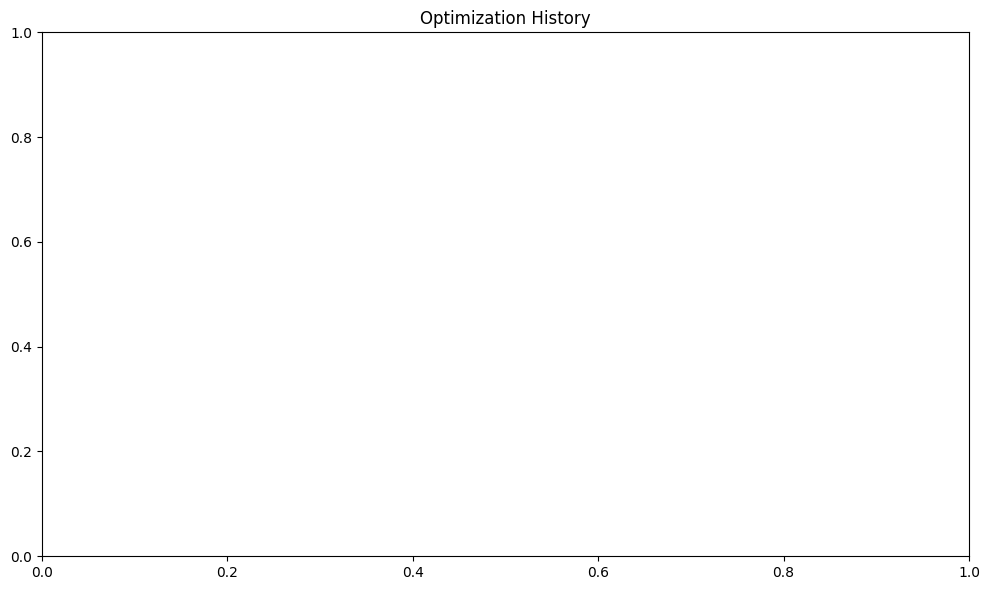

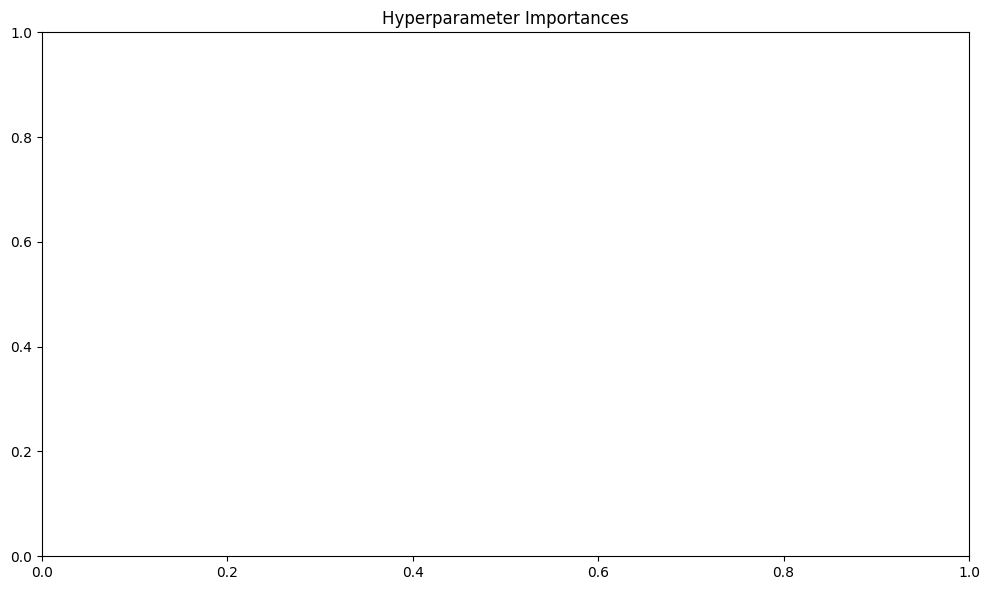

Best parameters have been saved to 'best_params.json'


In [ ]:
import optuna
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

def model_init():
    return RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=y_train.shape[1])

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])
    num_train_epochs = trial.suggest_int('num_train_epochs', 2, 15)
    warmup_steps = trial.suggest_int('warmup_steps', 100, 1000)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.1)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0, 0.1)

    training_args = TrainingArguments(
        output_dir='./results',  # Use temporary directory
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=64,
        warmup_steps=warmup_steps,
        weight_decay=weight_decay,
        logging_dir='./logs',  # Use temporary directory
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',  # Don't save checkpoints
        save_total_limit=3,  # Only save the last checkpoint
        learning_rate=learning_rate,
        load_best_model_at_end=True,
        metric_for_best_model='eval_accuracy',
        greater_is_better=True,
    )

    model = model_init()
    for name, module in model.named_modules():
        if 'dropout' in name:
            module.p = dropout_rate

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result["eval_loss"]

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)
best_params = study.best_params
print(f"Best hyperparameters found were: {best_params}")

# Visualize optimization history
plt.figure(figsize=(10, 6))
optuna.visualization.plot_optimization_history(study)
plt.title('Optimization History')
plt.tight_layout()
plt.show()

# Visualize parameter importances
plt.figure(figsize=(10, 6))
optuna.visualization.plot_param_importances(study)
plt.title('Hyperparameter Importances')
plt.tight_layout()
plt.show()

# Save best parameters to a file
import json
with open('best_params.json', 'w') as f:
    json.dump(best_params, f)

print("Best parameters have been saved to 'best_params.json'")

attempt 4

In [ ]:
import optuna
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    true_labels = p.label_ids.argmax(-1)
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

def model_init():
    return RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=y_train.shape[1])

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1.5e-5, 4e-5)
    batch_size = trial.suggest_categorical('batch_size', [16, 24, 32])
    num_train_epochs = trial.suggest_int('num_train_epochs', 7, 15)
    warmup_steps = trial.suggest_int('warmup_steps', 200, 800)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 5e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.02, 0.08)

    training_args = TrainingArguments(
        output_dir='./results',  # Use temporary directory
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=64,
        warmup_steps=warmup_steps,
        weight_decay=weight_decay,
        logging_dir='./logs',  # Use temporary directory
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',  # Don't save checkpoints
        save_total_limit=3,  # Only save the last checkpoint
        learning_rate=learning_rate,
        load_best_model_at_end=True,
        metric_for_best_model='eval_accuracy',
        greater_is_better=True,
    )

    model = model_init()
    for name, module in model.named_modules():
        if 'dropout' in name:
            module.p = dropout_rate

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result["eval_loss"]

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)
best_params = study.best_params
print(f"Best hyperparameters found were: {best_params}")

# Visualize optimization history
plt.figure(figsize=(10, 6))
optuna.visualization.plot_optimization_history(study)
plt.title('Optimization History')
plt.tight_layout()
plt.show()

# Visualize parameter importances
plt.figure(figsize=(10, 6))
optuna.visualization.plot_param_importances(study)
plt.title('Hyperparameter Importances')
plt.tight_layout()
plt.show()

# Save best parameters to a file
import json
with open('best_params.json', 'w') as f:
    json.dump(best_params, f)

print("Best parameters have been saved to 'best_params.json'")

[I 2024-08-03 19:48:34,878] A new study created in memory with name: no-name-7f6c050c-c06a-4694-83a8-aa9a5cc86cb9
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transf

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.663800,0.590066,0.226190,0.137026,0.226190,0.162819
2,0.514400,0.488923,0.257143,0.066122,0.257143,0.105195
3,0.487200,0.489478,0.257143,0.066122,0.257143,0.105195
4,0.472900,0.469764,0.283333,0.176819,0.283333,0.155884
5,0.423700,0.421181,0.500000,0.362252,0.500000,0.409002
6,0.398300,0.370230,0.511905,0.569581,0.511905,0.492049
7,0.356900,0.349354,0.547619,0.546256,0.547619,0.523380
8,0.316500,0.353402,0.509524,0.538568,0.509524,0.506425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 19:52:45,076] Trial 0 finished with value: 0.3493541181087494 and parameters: {'learning_rate': 1.8096508100822427e-05, 'batch_size': 24, 'num_train_epochs': 8, 'warmup_steps': 654, 'weight_decay': 0.014192211993189258, 'dropout_rate': 0.06814790770073105}. Best is trial 0 with value: 0.3493541181087494.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.521400,0.490957,0.247619,0.078942,0.247619,0.110104
2,0.482100,0.483618,0.288095,0.390957,0.288095,0.187019
3,0.446400,0.419126,0.473810,0.443820,0.473810,0.443067
4,0.377400,0.365631,0.528571,0.519055,0.528571,0.489662
5,0.303400,0.352243,0.561905,0.591206,0.561905,0.528396
6,0.230700,0.365509,0.488095,0.524046,0.488095,0.483679
7,0.157600,0.380993,0.523810,0.524165,0.523810,0.509710
8,0.110200,0.427828,0.511905,0.511743,0.511905,0.507253
9,0.069200,0.482150,0.533333,0.569936,0.533333,0.522337
10,0.061200,0.455907,0.564286,0.565241,0.564286,0.564375


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 20:03:11,573] Trial 1 finished with value: 0.45590686798095703 and parameters: {'learning_rate': 3.835474913757924e-05, 'batch_size': 24, 'num_train_epochs': 15, 'warmup_steps': 445, 'weight_decay': 0.01749608951595133, 'dropout_rate': 0.022995870084310692}. Best is trial 0 with value: 0.3493541181087494.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.681600,0.535468,0.252381,0.104332,0.252381,0.118744
2,0.484900,0.488763,0.252381,0.104004,0.252381,0.118337
3,0.480400,0.477602,0.254762,0.066140,0.254762,0.105016
4,0.412500,0.402049,0.483333,0.379916,0.483333,0.402260
5,0.384700,0.368095,0.538095,0.459983,0.538095,0.460058
6,0.321400,0.339010,0.554762,0.607834,0.554762,0.530011
7,0.269200,0.363433,0.595238,0.628291,0.595238,0.585494
8,0.209700,0.350614,0.578571,0.598010,0.578571,0.562523
9,0.156500,0.405214,0.547619,0.559119,0.547619,0.526939
10,0.131000,0.410836,0.564286,0.572624,0.564286,0.544154


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 20:16:51,648] Trial 2 finished with value: 0.3634333610534668 and parameters: {'learning_rate': 2.4049061951520377e-05, 'batch_size': 32, 'num_train_epochs': 14, 'warmup_steps': 242, 'weight_decay': 0.0004709021909448841, 'dropout_rate': 0.07137446369112599}. Best is trial 0 with value: 0.3493541181087494.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.550300,0.497705,0.252381,0.110803,0.252381,0.134278
2,0.483200,0.481496,0.276190,0.152808,0.276190,0.153311
3,0.423300,0.455333,0.319048,0.261746,0.319048,0.234137
4,0.405800,0.392941,0.485714,0.389027,0.485714,0.402722
5,0.325800,0.357847,0.561905,0.510496,0.561905,0.518250
6,0.304900,0.359320,0.528571,0.589633,0.528571,0.507414
7,0.243600,0.354410,0.554762,0.564775,0.554762,0.549532
8,0.158800,0.390696,0.514286,0.526958,0.514286,0.497495
9,0.107800,0.422568,0.502381,0.532985,0.502381,0.481530
10,0.106000,0.427972,0.528571,0.547953,0.528571,0.527881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-08-03 20:35:19,924] Trial 3 finished with value: 0.3578471839427948 and parameters: {'learning_rate': 1.8784248637004945e-05, 'batch_size': 16, 'num_train_epochs': 15, 'warmup_steps': 608, 'weight_decay': 0.002695753758749197, 'dropout_rate': 0.03367386887074256}. Best is trial 0 with value: 0.3493541181087494.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.523300,0.492164,0.254762,0.106626,0.254762,0.119304
2,0.467900,0.477602,0.285714,0.182765,0.285714,0.161598
3,0.400500,0.399605,0.523810,0.487577,0.523810,0.469443
4,0.375900,0.365039,0.528571,0.593762,0.528571,0.478925
5,0.282300,0.353578,0.580952,0.612546,0.580952,0.550506
6,0.237200,0.369304,0.561905,0.570637,0.561905,0.546917
7,0.158900,0.425288,0.521429,0.547100,0.521429,0.507346
8,0.120100,0.423110,0.516667,0.536257,0.516667,0.513037
9,0.088700,0.458569,0.519048,0.551422,0.519048,0.521894
10,0.098100,0.487469,0.552381,0.583964,0.552381,0.550830


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 20:46:08,940] Trial 4 finished with value: 0.35357826948165894 and parameters: {'learning_rate': 2.889875177470008e-05, 'batch_size': 16, 'num_train_epochs': 10, 'warmup_steps': 554, 'weight_decay': 0.00023224308537708204, 'dropout_rate': 0.02503109499045562}. Best is trial 0 with value: 0.3493541181087494.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.734400,0.558307,0.219048,0.175325,0.219048,0.180914
2,0.498200,0.493037,0.257143,0.066122,0.257143,0.105195
3,0.482400,0.487693,0.247619,0.078942,0.247619,0.110104
4,0.461100,0.466608,0.376190,0.323706,0.376190,0.293272
5,0.435900,0.400474,0.495238,0.399889,0.495238,0.431027
6,0.379500,0.372421,0.478571,0.462583,0.478571,0.426247
7,0.343500,0.341006,0.573810,0.586488,0.573810,0.549877
8,0.295500,0.336505,0.573810,0.572953,0.573810,0.550789


<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input

[I 2024-08-03 20:56:07,814] Trial 5 finished with value: 0.3410060405731201 and parameters: {'learning_rate': 2.4972378923100455e-05, 'batch_size': 32, 'num_train_epochs': 8, 'warmup_steps': 413, 'weight_decay': 0.0003376084868438845, 'dropout_rate': 0.07945625390135988}. Best is trial 5 with value: 0.3410060405731201.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.578800,0.522410,0.283333,0.164996,0.283333,0.201029
2,0.488700,0.490649,0.247619,0.078942,0.247619,0.110104
3,0.481600,0.481826,0.321429,0.419167,0.321429,0.242185
4,0.437400,0.404420,0.473810,0.424529,0.473810,0.403208
5,0.376200,0.362662,0.561905,0.495787,0.561905,0.513715
6,0.339200,0.343736,0.554762,0.622479,0.554762,0.528175
7,0.299500,0.347476,0.564286,0.587538,0.564286,0.548415
8,0.250100,0.346501,0.538095,0.549067,0.538095,0.528084
9,0.189700,0.390831,0.545238,0.570653,0.545238,0.528167


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 21:08:21,032] Trial 6 finished with value: 0.34747573733329773 and parameters: {'learning_rate': 2.9671224582157515e-05, 'batch_size': 24, 'num_train_epochs': 9, 'warmup_steps': 563, 'weight_decay': 0.013000138765017258, 'dropout_rate': 0.07517275885918322}. Best is trial 5 with value: 0.3410060405731201.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.534300,0.490719,0.257143,0.066122,0.257143,0.105195
2,0.482400,0.479450,0.254762,0.108859,0.254762,0.119265
3,0.419700,0.430103,0.450000,0.500815,0.450000,0.405119
4,0.400400,0.360506,0.490476,0.552368,0.490476,0.460404
5,0.306000,0.351069,0.571429,0.583258,0.571429,0.547027
6,0.273300,0.365162,0.530952,0.537061,0.530952,0.513650
7,0.190800,0.359970,0.554762,0.551714,0.554762,0.544929


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 21:17:36,090] Trial 7 finished with value: 0.35106927156448364 and parameters: {'learning_rate': 2.4145941907008807e-05, 'batch_size': 16, 'num_train_epochs': 7, 'warmup_steps': 537, 'weight_decay': 0.0021800619220734585, 'dropout_rate': 0.036197378494883525}. Best is trial 5 with value: 0.3410060405731201.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.707500,0.656957,0.228571,0.117266,0.228571,0.145000
2,0.499700,0.492570,0.257143,0.066122,0.257143,0.105195
3,0.484300,0.479966,0.254762,0.109022,0.254762,0.119468
4,0.439300,0.437809,0.440476,0.431244,0.440476,0.362438
5,0.410700,0.387102,0.490476,0.395804,0.490476,0.414664
6,0.354400,0.355705,0.547619,0.588030,0.547619,0.518792
7,0.327800,0.342780,0.573810,0.618986,0.573810,0.554633


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

[I 2024-08-03 21:20:57,686] Trial 8 finished with value: 0.34278035163879395 and parameters: {'learning_rate': 2.2918747367182254e-05, 'batch_size': 32, 'num_train_epochs': 7, 'warmup_steps': 511, 'weight_decay': 0.00030921714486341887, 'dropout_rate': 0.0468956297790438}. Best is trial 5 with value: 0.3410060405731201.
<ipython-input-21-01072edc2a86>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-21-01072edc2a86>:22: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.613700,0.507683,0.254762,0.112149,0.254762,0.132482
2,0.487800,0.488552,0.257143,0.066122,0.257143,0.105195
3,0.419700,0.428558,0.414286,0.383117,0.414286,0.356132
4,0.398600,0.365011,0.521429,0.473404,0.521429,0.483950
5,0.331600,0.342686,0.571429,0.599935,0.571429,0.539672
6,0.304900,0.358288,0.526190,0.570249,0.526190,0.507039
7,0.251200,0.340465,0.554762,0.558629,0.554762,0.545107
8,0.186200,0.389591,0.540476,0.553374,0.540476,0.535802
9,0.137400,0.403524,0.523810,0.558365,0.523810,0.511591
10,0.115000,0.421264,0.559524,0.570387,0.559524,0.553944


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

model training

In [ ]:
# Extract the best hyperparameters
best_learning_rate = best_params['learning_rate']
best_batch_size = best_params['batch_size']
best_num_train_epochs = best_params['num_train_epochs']
best_warmup_steps = best_params['warmup_steps']
best_weight_decay = best_params['weight_decay']
best_dropout_rate = best_params['dropout_rate']

# Define the training arguments with the best hyperparameters
best_training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_num_train_epochs,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=64,
    warmup_steps=best_warmup_steps,
    weight_decay=best_weight_decay,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=best_learning_rate,
)

# Modify the model's dropout rate
best_model = model_init()
for name, module in best_model.named_modules():
    if 'dropout' in name:
        module.p = best_dropout_rate

# Define the Trainer with the best hyperparameters
best_trainer = Trainer(
    model=best_model,
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the final model
best_trainer.train()

# Evaluate the final model
best_eval_result = best_trainer.evaluate()

# Display performance metrics
print(f"Final Model - Accuracy: {best_eval_result['eval_accuracy']}")
print(f"Final Model - Precision: {best_eval_result['eval_precision']}")
print(f"Final Model - Recall: {best_eval_result['eval_recall']}")
print(f"Final Model - F1 Score: {best_eval_result['eval_f1']}")


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.667300,0.626787,0.228571,0.100086,0.228571,0.134751
2,0.465000,0.461746,0.321429,0.199305,0.321429,0.205276
3,0.377600,0.385888,0.550000,0.499294,0.550000,0.512726
4,0.374900,0.368188,0.514286,0.522640,0.514286,0.463404
5,0.292000,0.355169,0.573810,0.585912,0.573810,0.550776
6,0.259500,0.372006,0.509524,0.527281,0.509524,0.492323
7,0.181000,0.394288,0.540476,0.552597,0.540476,0.528766
8,0.115100,0.403593,0.533333,0.543627,0.533333,0.522412
9,0.084700,0.408046,0.547619,0.552970,0.547619,0.537792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-13-a52f02629b38>:51: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib

Final Model - Accuracy: 0.5476190476190477
Final Model - Precision: 0.5529696772649662
Final Model - Recall: 0.5476190476190477
Final Model - F1 Score: 0.537791559299353


In [ ]:
import optuna.visualization as vis
import matplotlib.pyplot as plt

# Visualize optimization history
fig = vis.plot_optimization_history(study)
fig.show()

# Visualize parameter importances
fig = vis.plot_param_importances(study)
fig.show()

# Visualize parallel coordinate plot
fig = vis.plot_parallel_coordinate(study)
fig.show()

# Visualize slice plot
fig = vis.plot_slice(study)
fig.show()

# Visualize hyperparameter relationship
fig = vis.plot_contour(study)
fig.show()


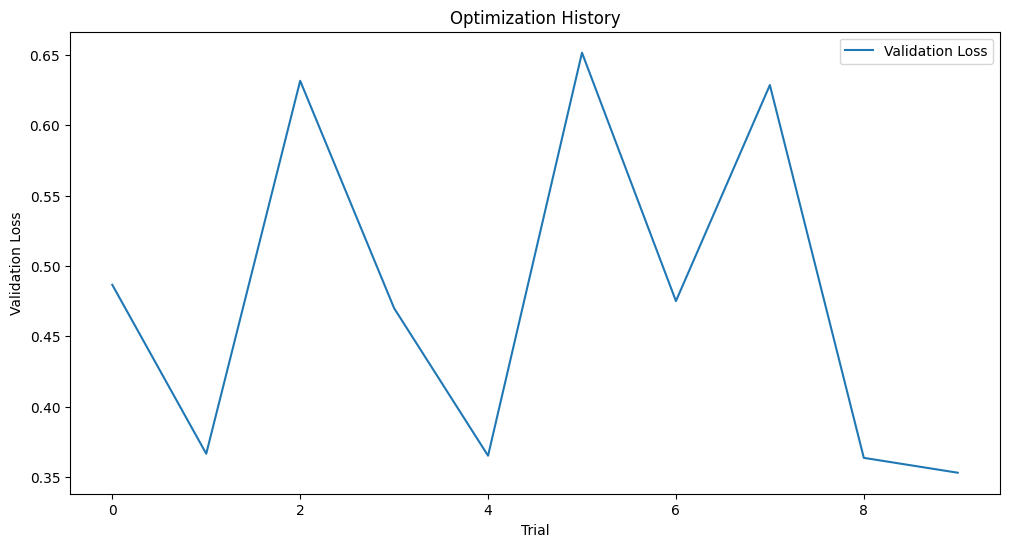

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import optuna.visualization as vis

# Visualize training and validation loss
def plot_optimization_history(study):
    fig = plt.figure(figsize=(12, 6))
    plt.plot(study.trials_dataframe().value, label='Validation Loss')
    plt.xlabel('Trial')
    plt.ylabel('Validation Loss')
    plt.title('Optimization History')
    plt.legend()
    plt.show()

# Visualize accuracy
def plot_param_importances(study):
    fig = plt.figure(figsize=(12, 6))
    vis.plot_param_importances(study)
    plt.show()

# Plot optimization history
plot_optimization_history(study)

# Plot parameter importances
plot_param_importances(study)


### Cross-validation for models

for non-bert models

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(model_fn, X, y, skf):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        accuracy, precision, recall, f1 = model_fn(X_train, y_train, X_test, y_test)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Cross-validate Random Forest
rf_results = cross_validate_model(train_random_forest, X_train_bow, y_train_encoded, skf)
print(f'Random Forest - Accuracy: {rf_results[0]}, Precision: {rf_results[1]}, Recall: {rf_results[2]}, F1 Score: {rf_results[3]}')

# Cross-validate SVM
svm_results = cross_validate_model(train_svm, X_train_bow, y_train_encoded, skf)
print(f'SVM - Accuracy: {svm_results[0]}, Precision: {svm_results[1]}, Recall: {svm_results[2]}, F1 Score: {svm_results[3]}')

# Cross-validate Neural Network
#nn_results = cross_validate_model(train_neural_network, X_train_bow, y_train_encoded, skf)
#print(f'Neural Network - Accuracy: {nn_results[0]}, Precision: {nn_results[1]}, Recall: {nn_results[2]}, F1 Score: {nn_results[3]}')


In [ ]:
X_train_bow_dense = X_train_bow.toarray()
X_test_bow_dense = X_test_bow.toarray()


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded_cat = to_categorical(y_train_encoded)
y_test_encoded_cat = to_categorical(y_test_encoded)


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split




# Function for cross-validation
def cross_validate_model(model_fn, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        accuracy, precision, recall, f1 = model_fn(X_train, y_train, X_test, y_test)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Neural network training function
def train_neural_network(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Ensure the output layer matches the number of classes

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    y_pred_prob = model.predict(X_test)
    y_pred = y_pred_prob.argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Cross-validate Neural Network
nn_results = cross_validate_model(train_neural_network, X_train_bow_dense, y_train_encoded_cat, n_splits=5)
print(f'Neural Network - Accuracy: {nn_results[0]}, Precision: {nn_results[1]}, Recall: {nn_results[2]}, F1 Score: {nn_results[3]}')


for bert models

In [ ]:
# Combine the labels into a single column for encoding
y_combined = data_cleaned[['Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing'] ].idxmax(axis=1)

# Encode the combined labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_combined)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

def train_and_evaluate_bert(train_texts, train_labels, val_texts, val_labels):
    # Tokenize the data
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_encodings = bert_tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
    val_encodings = bert_tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=128)

    train_dataset = CustomDataset(train_encodings, train_labels)
    val_dataset = CustomDataset(val_encodings, val_labels)

    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(np.unique(train_labels)))

    training_args = TrainingArguments(
        output_dir='./results',          # output directory
        num_train_epochs=1,              # total number of training epochs
        per_device_train_batch_size=16,  # batch size for training
        per_device_eval_batch_size=64,   # batch size for evaluation
        warmup_steps=500,                # number of warmup steps for learning rate scheduler
        weight_decay=0.01,               # strength of weight decay
        logging_dir='./logs',            # directory for storing logs
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=lambda p: {"accuracy": accuracy_score(p.label_ids, p.predictions.argmax(-1))}
    )

    trainer.train()
    metrics = trainer.evaluate()

    accuracy = metrics['eval_accuracy']
    predictions = trainer.predict(val_dataset).predictions.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(val_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1

# Cross-validate BERT
bert_accuracies = []
bert_precisions = []
bert_recalls = []
bert_f1s = []

for train_index, test_index in skf.split(data_cleaned['Cleaned_Question_Comment'], y_encoded):
    X_train, X_test = data_cleaned['Cleaned_Question_Comment'].iloc[train_index], data_cleaned['Cleaned_Question_Comment'].iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    accuracy, precision, recall, f1 = train_and_evaluate_bert(X_train, y_train, X_test, y_test)
    bert_accuracies.append(accuracy)
    bert_precisions.append(precision)
    bert_recalls.append(recall)
    bert_f1s.append(f1)

bert_results = np.mean(bert_accuracies), np.mean(bert_precisions), np.mean(bert_recalls), np.mean(bert_f1s)
print(f'BERT - Accuracy: {bert_results[0]}, Precision: {bert_results[1]}, Recall: {bert_results[2]}, F1 Score: {bert_results[3]}')


In [ ]:
# Collect results into a DataFrame for comparison
results = [
    ['Random Forest', 'BoW', rf_results[0], rf_results[1], rf_results[2], rf_results[3]],
    ['SVM', 'BoW', svm_results[0], svm_results[1], svm_results[2], svm_results[3]],
    ['Neural Network', 'BoW', nn_results[0], nn_results[1], nn_results[2], nn_results[3]],
    ['BERT', 'BoW', bert_results[0], bert_results[1], bert_results[2], bert_results[3]]
]

results_df = pd.DataFrame(results, columns=['Model', 'Embedding', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

visualization for crossvalidation results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
results_melted = results_df.melt(id_vars=['Model', 'Embedding'], var_name='Metric', value_name='Score')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(14, 8))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Precision'])
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Recall'])
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# F1 Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'F1 Score'])
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Interpret the model results and ensure they are sensible
# This can involve visualizing feature importance, analyzing confusion matrices, etc.

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')


## Sentimental Analysis

comments only

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the dataset
# data_cleaned = pd.read_csv('path_to_your_cleaned_dataset.csv')

# Tokenizer and model for sentiment analysis
sentiment_tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
sentiment_model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure sentiment model is in evaluation mode
sentiment_model.eval()

# Define sentiment analysis function
def sentiment_analysis(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

# Mapping sentiment labels
sentiment_labels = {
    0: 'very negative',
    1: 'negative',
    2: 'neutral',
    3: 'positive',
    4: 'very positive'
}

# Apply sentiment analysis to comments
data_cleaned['Sentiment'] = data_cleaned['Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, sentiment_tokenizer, sentiment_model)])

# Display the first few rows with sentiment labels
print(data_cleaned[['Comment', 'Sentiment']].head())

# Save the results to a new CSV file
data_cleaned.to_csv('sentiment_analysis_results.csv', index=False)


comments+questions

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the dataset
# data_cleaned = pd.read_csv('path_to_your_cleaned_dataset.csv')

# Tokenizer and model for sentiment analysis
sentiment_tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
sentiment_model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure sentiment model is in evaluation mode
sentiment_model.eval()

# Define sentiment analysis function
def sentiment_analysis(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

# Mapping sentiment labels
sentiment_labels = {
    0: 'very negative',
    1: 'negative',
    2: 'neutral',
    3: 'positive',
    4: 'very positive'
}

# Apply sentiment analysis to concatenated questions and comments
data_cleaned['Sentiment'] = data_cleaned['Cleaned_Question_Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, sentiment_tokenizer, sentiment_model)])

# Display the first few rows with sentiment labels
print(data_cleaned[['Cleaned_Question_Comment', 'Sentiment']].head())

# Save the results to a new CSV file
data_cleaned.to_csv('sentiment_analysis_results_QC.csv', index=False)


///

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the dataset
# data_cleaned = pd.read_csv('path_to_your_cleaned_dataset.csv')


In [ ]:
# Tokenizer and model for sentiment analysis
sentiment_tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
sentiment_model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure sentiment model is in evaluation mode
sentiment_model.eval()

# Define sentiment analysis function
def sentiment_analysis(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

# Mapping sentiment labels
sentiment_labels = {
    0: 'very negative',
    1: 'negative',
    2: 'neutral',
    3: 'positive',
    4: 'very positive'
}


In [ ]:
# Apply sentiment analysis to comments
data_cleaned['Comment_Sentiment'] = data_cleaned['Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, sentiment_tokenizer, sentiment_model)])

# Display the first few rows with comment sentiment labels
print(data_cleaned[['Comment', 'Comment_Sentiment']].head())


In [ ]:
# Apply sentiment analysis to concatenated questions and comments
data_cleaned['Combined_Sentiment'] = data_cleaned['Cleaned_Question_Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, sentiment_tokenizer, sentiment_model)])

# Display the first few rows with combined sentiment labels
print(data_cleaned[['Cleaned_Question_Comment', 'Combined_Sentiment']].head())


In [ ]:
# Compare the results
comparison = data_cleaned[['Comment_Sentiment', 'Combined_Sentiment']].value_counts().unstack().fillna(0)
print(comparison)

# Save the results to a new CSV file
data_cleaned.to_csv('sentiment_analysis_comparison_results.csv', index=False)

# Optionally, visualize the comparison
import matplotlib.pyplot as plt

comparison.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Comparison: Comments vs. Combined Questions and Comments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(title='Combined Sentiment')
plt.show()


robota sentiment

In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset
#data_cleaned = pd.read_csv('/path_to_your_cleaned_dataset.csv')

# Tokenizer and model for sentiment analysis
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)

# Ensure the model is in evaluation mode
model.eval()

# Define sentiment analysis function
def sentiment_analysis(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

# Mapping sentiment labels
sentiment_labels = {
    0: 'very negative',
    1: 'negative',
    2: 'neutral',
    3: 'positive',
    4: 'very positive'
}

# Apply sentiment analysis to comments
data_cleaned['Comment_Sentiment'] = data_cleaned['Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, tokenizer, model)])

# Apply sentiment analysis to concatenated questions and comments
data_cleaned['Combined_Sentiment'] = data_cleaned['Cleaned_Question_Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, tokenizer, model)])

# Display the first few rows with sentiment labels
print(data_cleaned[['Comment', 'Comment_Sentiment', 'Cleaned_Question_Comment', 'Combined_Sentiment']].head())


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# data_cleaned = pd.read_csv('path_to_your_dataset.csv')  # Ensure this is your dataset

# Tokenizer and model for sentiment analysis
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)

# Ensure the model is in evaluation mode
model.eval()

# Define sentiment analysis function
def sentiment_analysis(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

# Apply sentiment analysis to comments
data_cleaned['Predicted_Sentiment'] = data_cleaned['Comment'].apply(lambda x: sentiment_analysis(x, tokenizer, model))

# Mapping sentiment labels
sentiment_labels = {
    0: 'very negative',
    1: 'negative',
    2: 'neutral',
    3: 'positive',
    4: 'very positive'
}

# Map numerical sentiment predictions to label names
data_cleaned['Sentiment_Label'] = data_cleaned['Predicted_Sentiment'].map(sentiment_labels)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Label', data=data_cleaned, order=['very negative', 'negative', 'neutral', 'positive', 'very positive'])
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


#### Sentimenal analysis with Huggingface pre-trained models. (comments only)

In [ ]:
import pandas as pd

# Load your dataset
#data_cleaned = pd.read_csv('path_to_your_cleaned_dataset.csv')

# Use only the 'Comment' column as input
comments = data_cleaned['Comment'].tolist()


In [ ]:
print (data_cleaned['comment'].head())


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Create a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [ ]:
# Predict sentiment for each comment
sentiments = sentiment_pipeline(comments)

# Extract sentiment labels and scores
data_cleaned['Sentiment'] = [s['label'] for s in sentiments]
data_cleaned['Sentiment_Score'] = [s['score'] for s in sentiments]

# Display the first few rows with sentiment labels
print(data_cleaned[['Comment', 'Sentiment', 'Sentiment_Score']].head())


In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sentiment_counts = data_cleaned['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Output

In [ ]:
# Display the first few rows with sentiment labels
data_cleaned[['Comment', 'Sentiment','Purpose', 'Customer', 'Innovation', 'One team', 'Growth and Development', 'Diversity and Wellbeing']].head(20)

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
#data_cleaned = pd.read_csv('path_to_your_cleaned_dataset.csv')

# Tokenizer and model for sentiment analysis
sentiment_tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
sentiment_model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure sentiment model is in evaluation mode
sentiment_model.eval()

# Define sentiment analysis function
def sentiment_analysis(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

# Map sentiment labels
sentiment_labels = {
    0: 'very negative',
    1: 'negative',
    2: 'neutral',
    3: 'positive',
    4: 'very positive'
}

# Apply sentiment analysis to comments
data_cleaned['Sentiment'] = data_cleaned['Comment'].apply(lambda x: sentiment_labels[sentiment_analysis(x, sentiment_tokenizer, sentiment_model)])

# Display a sample of comments with their sentiment
sample_size = 10  # Number of samples to display
sample = data_cleaned.sample(n=sample_size, random_state=42)
print(sample[['Comment', 'Sentiment']])

# Display the distribution of sentiments
sentiment_distribution = data_cleaned['Sentiment'].value_counts()
print(sentiment_distribution)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the distribution of sentiments
sns.countplot(x='Sentiment', data=data_cleaned, order=['very negative', 'negative', 'neutral', 'positive', 'very positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()
